In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


from pymatgen import Lattice, Structure, Molecule
from pymatgen.io.vasp import outputs as vaspout
from pymatgen.io.vasp import inputs as vaspin
from pymatgen.symmetry import analyzer
from random import shuffle

import pymatgen as pmg
from pymatgen.io.vasp import outputs as vasp
from pymatgen.core.surface import Slab, SlabGenerator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.transformations import standard_transformations
from scipy.interpolate import interp1d

In [3]:
def PlotPotential(folder):
    slab3=pmg.Structure.from_file(folder+"/CONTCAR")
    locpot3=vasp.Locpot.from_file(folder+"/LOCPOT")
    y=locpot3.get_average_along_axis(2)
    x=locpot3.get_axis_grid(2)

    yy=y
    win=np.ones(len(x)//3)
    filtered=np.convolve(yy, win, mode='same') / sum(win)
    x_len=len(x)
    bulk_min=int(x_len*(0.3-0.05))
    bulk_max=int(x_len*(0.3+0.05))
    vac_min=int(x_len*(0.8-0.05))
    vac_max=int(x_len*(0.8+0.05))
    bulk=np.average(filtered[bulk_min:bulk_max])
    vac=np.average(filtered[vac_min:vac_max])

    fig, ax1 = plt.subplots(figsize=(6,4))
    ax1.plot(x,y-np.amax(y))
    #ax1.plot(x,filtered-np.amax(y))
    #ax1.plot(x[bulk_min:bulk_max],bulk*np.ones(bulk_max-bulk_min)-np.amax(y),"r-",lw=5)
    #ax1.plot(x[vac_min:vac_max],vac*np.ones(vac_max-vac_min)-np.amax(y),"k-",lw=5)
    #ax1.text(x[int((bulk_max+bulk_min)/2)],bulk-2-np.amax(y),'V={:.3f}'.format(bulk),backgroundcolor='w',color='r')
    #ax1.text(x[int((vac_max+vac_min)/2)],vac-2-np.amax(y),'V={:.3f}'.format(vac),backgroundcolor='w',color='k')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=16) 
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=16) 
    plt.ylabel('Potential (eV)', fontsize=16)
    plt.xlabel(r'Position ($\rm \AA$)', fontsize=16)
    
    #plt.show()
    plt.savefig('potential.png', bbox_inches='tight', format='png', dpi=300)

    return (x, y-np.amax(y))

In [11]:
#N are attached DOWN

Sc = 0.1953249999999969
Ga = 1 - 0.7929880000000011

Ag = np.array([2/3, 1/3, 0]) #N: 0.377, A
Bg = np.array([1/3, 2/3, 1]) #N: 0.377, B
# Forward 
As = np.array([2/3, 1/3, 2]) #N: 0.5, C
Cs = np.array([  0,   0, 3]) #N: 0.5, B
Bs = np.array([1/3, 2/3, 4]) #N: 0.5, A
# Backward

# Wurtzite-bonded N atoms take the A and B positions. 
# Rocksalt-bonded N atoms take the position of the cation 1.5 up or down from it. 

In [12]:
#Insert full periods within each to increase thickness. AB for Ga, ACB for Sc

Ag = np.array([2/3, 1/3, 0])
Bg = np.array([1/3, 2/3, 1])
# Backward
Cs = np.array([  0,   0, 2])
Bs = np.array([1/3, 2/3, 2])
# Backward

In [13]:
Ag = np.array([2/3, 1/3, 0])
Bg = np.array([1/3, 2/3, 1])
# Forward
As = np.array([2/3, 1/3, 2])
Cs = np.array([  0,   0, 3])
# Foward

# Chirality?

In [14]:
# 8,8s: 

Ag = np.array([2/3, 1/3, 0])
Bg = np.array([1/3, 2/3, 1])
Ag = np.array([2/3, 1/3, 2])
Bg = np.array([1/3, 2/3, 3])
Ag = np.array([2/3, 1/3, 4])
Bg = np.array([1/3, 2/3, 5])
Ag = np.array([2/3, 1/3, 6])
Bg = np.array([1/3, 2/3, 7])

As = np.array([2/3, 1/3, 13])
Cs = np.array([  0,   0, 8])
Bs = np.array([1/3, 2/3, 9])
As = np.array([2/3, 1/3, 10])
Cs = np.array([  0,   0, 11])
Bs = np.array([1/3, 2/3, 12])
As = np.array([2/3, 1/3, 13])
Cs = np.array([  0,   0, 14])
Bs = np.array([1/3, 2/3, 15])


In [57]:
InitialGaN = Structure.from_file('/home/nadamski/init.vasp')


In [54]:

GaSc = InitialGaN * [[1, 0, 0], [0, 1, 0], [0, 0, 16]]

cations = Sc * 8 + Ga * 8

A = [2/3, 1/3]
B = [1/3, 2/3]
C = [0, 0]

for at in [0, 2, 4,6]:
    GaSc[at] = 'Ga', A + [at*Ga/cations]
    GaSc[16+at] = 'N', B + [(at-0.2456)*Ga/cations]
for at in [1, 3, 5,7]:
    GaSc[at] = 'Ga', B + [at*Ga/cations]
    GaSc[16+at] = 'N', A + [(at-0.2456)*Ga/cations]

    
for at in [10, 13]:
    GaSc[at] = 'Sc', A + [(at-8)*Sc/cations + 8*Ga/cations]
    GaSc[16+at] = 'N', C + [(at-8.5)*Sc/cations + 8*Ga/cations]

for at in [8,11, 14]:
    GaSc[at] = 'Sc', C + [(at-8)*Sc/cations + 8*Ga/cations]
    GaSc[16+at] = 'N', B + [(at-8.5)*Sc/cations + 8*Ga/cations]

for at in [9, 12, 15]:
    GaSc[at] = 'Sc', B + [(at-8)*Sc/cations + 8*Ga/cations]
    GaSc[16+at] = 'N', A + [(at-8.5)*Sc/cations + 8*Ga/cations]
    
GaSc[16] = 'N', C + [1 - 0.5*Sc/cations]
GaSc[24] = 'N', B + [(8-0.35)*Ga/cations]


GaSc.to(fmt='poscar',filename='/home/nadamski/Ga6Sc8/88.vasp')

In [102]:
wz = (0.4995750046824267 - 0.3770187094116298) * 2

In [103]:
wz

0.24511259054159384

In [18]:
(0.5 - 0.4995750046824267) + 0.3770187094116298

0.3774437047292031

In [26]:

GaSc = InitialGaN * [[1, 0, 0], [0, 1, 0], [0, 0, 21]]

nSc = 11
nGa = 10

Ga = 5.2000529025666484/2
Sc = 2.2489140581064202*2*3**0.5/3*(1-0.0035823439613637213)
cations = Sc * nSc + Ga * nGa

e3 = -2 * (1- 2.2489140581064202*2**0.5 / 3.2013335674394536) * 104.56 / 380.9 
wz = 0
A = [2/3, 1/3]
B = [1/3, 2/3]
C = [0, 0]

for at in [0, 2, 4, 6, 8]:
    GaSc[at] = 'Ga', A + [at*Ga/cations]
    GaSc[2*nGa+at] = 'N', B + [(at -wz)*Ga/cations]
for at in [1, 3, 5, 7, 9]:
    GaSc[at] = 'Ga', B + [at*Ga/cations]
    GaSc[2*nGa+at] = 'N', A + [(at -wz)*Ga/cations]

    
for at in [12, 15, 18]:
    GaSc[at] = 'Sc', A + [(at-nGa)*Sc/cations + nGa*Ga/cations]
    GaSc[2*nGa+at] = 'N', C + [(at-nGa -wz)*Sc/cations + nGa*Ga/cations]

for at in [10, 13, 16, 19]:
    GaSc[at] = 'Sc', C + [(at-nGa)*Sc/cations + nGa*Ga/cations]
    GaSc[2*nGa+at] = 'N', B + [(at-nGa -wz)*Sc/cations + nGa*Ga/cations]

for at in [11, 14, 17, 20]:
    GaSc[at] = 'Sc', B + [(at-nGa)*Sc/cations + nGa*Ga/cations]
    GaSc[2*nGa+at] = 'N', A + [(at-nGa -wz)*Sc/cations + nGa*Ga/cations]
    
GaSc[21] = 'N', C + [1 -wz*Sc/cations]
GaSc[30] = 'N', B + [(nGa -wz)*Ga/cations]
GaSc[41] = 'N', A + [(1 -wz)*Ga/cations]


GaSc.to(fmt='poscar',filename='/home/nadamski/strain.vasp')

In [104]:

GaSc = InitialGaN * [[1, 0, 0], [0, 1, 0], [0, 0, 28]]

nSc = 14
nGa = 14

Ga = 5.2000529025666484/2
Sc = 2.2489140581064202*2*3**0.5/3*(1-0.0035823439613637213)
cations = Sc * nSc + Ga * nGa

e3 = -2 * (1- 2.2489140581064202*2**0.5 / 3.2013335674394536) * 104.56 / 380.9 
wz = 0
A = [2/3, 1/3]
B = [1/3, 2/3]
C = [0, 0]

for at in np.arange(0, nGa, 2):
    at = int(at)
    GaSc[at] = 'Ga', A + [at*Ga/cations]
    GaSc[2*nGa+at] = 'N', B + [(at -wz)*Ga/cations]
for at in np.arange(1, nGa, 2):
    at = int(at)
    GaSc[at] = 'Ga', B + [at*Ga/cations]
    GaSc[2*nGa+at] = 'N', A + [(at -wz)*Ga/cations]

    
for at in np.arange(nGa+2, nGa+nSc, 3):
    at = int(at)
    GaSc[at] = 'Sc', A + [(at-nGa)*Sc/cations + nGa*Ga/cations]
    GaSc[2*nGa+at] = 'N', C + [(at-nGa -wz)*Sc/cations + nGa*Ga/cations]

for at in np.arange(nGa, nGa+nSc, 3):
    at = int(at)
    GaSc[at] = 'Sc', C + [(at-nGa)*Sc/cations + nGa*Ga/cations]
    GaSc[2*nGa+at] = 'N', B + [(at-nGa -wz)*Sc/cations + nGa*Ga/cations]

for at in np.arange(nGa+1, nGa+nSc, 3):
    at = int(at)
    GaSc[at] = 'Sc', B + [(at-nGa)*Sc/cations + nGa*Ga/cations]
    GaSc[2*nGa+at] = 'N', A + [(at-nGa -wz)*Sc/cations + nGa*Ga/cations]
    
GaSc[nGa+nSc] = 'N', C + [1 -wz*Sc/cations]
GaSc[nGa*2+nSc-1] = 'N', A + [(nGa -1 -wz)*Ga/cations]
GaSc[2*nGa+2*nSc-1] = 'N', A + [(-1 +wz)*Sc/cations]


GaSc.to(fmt='poscar',filename='/home/nadamski/strain245.vasp')

In [142]:
nSc = 8
nGa = 8


GaSc = InitialGaN * [[1, 0, 0], [0, 1, 0], [0, 0, nGa+nSc]]


Ga = 5.2000529025666484/2
Sc = 2.2489140581064202*2*3**0.5/3*(1-0.0035823439613637213)
cations = Sc * nSc + Ga * nGa

e3 = -2 * (1- 2.2489140581064202*2**0.5 / 3.2013335674394536) * 104.56 / 380.9 
wz = (0.4995750046824267 - 0.3770187094116298) * 2
wz = 0
A = [2/3, 1/3]
B = [1/3, 2/3]
C = [0, 0]
print(Sc)
for at in np.arange(0, nGa, 2):
    at = int(at)
    GaSc[at] = 'Ga', A + [at*Ga/cations]
    GaSc[2*nGa+at] = 'N', B + [(at -wz)*Ga/cations]
for at in np.arange(1, nGa, 2):
    at = int(at)
    GaSc[at] = 'Ga', B + [at*Ga/cations]
    GaSc[2*nGa+at] = 'N', A + [(at -wz)*Ga/cations]
    
#GaSc[nGa+nSc] = 'N', C + [1 -wz*Sc/cations]
GaSc[nGa*2+nSc-1] = 'N', A + [(nGa -1 -wz)*Ga/cations]

#A = [2/3+ 0.2, 1/3+ 0.2]
#B = [1/3+ 0.2, 2/3+ 0.2]
#C = [0+ 0.2, 0+ 0.2]
    
C = [2/3, 1/3]
A = [1/3, 2/3]
B = [0, 0]

    
for at in np.arange(nGa+2, nGa+nSc, 3):
    at = int(at)
    GaSc[at] = 'Sc', A + [(at-nGa)*Sc/cations + nGa*Ga/cations]
    GaSc[2*nGa+at] = 'N', C + [(at-nGa -wz)*Sc/cations + nGa*Ga/cations]

for at in np.arange(nGa, nGa+nSc, 3):
    at = int(at)
    GaSc[at] = 'Sc', C + [(at-nGa)*Sc/cations + nGa*Ga/cations]
    GaSc[2*nGa+at] = 'N', B + [(at-nGa -wz)*Sc/cations + nGa*Ga/cations]

for at in np.arange(nGa+1, nGa+nSc, 3):
    at = int(at)
    GaSc[at] = 'Sc', B + [(at-nGa)*Sc/cations + nGa*Ga/cations]
    GaSc[2*nGa+at] = 'N', A + [(at-nGa -wz)*Sc/cations + nGa*Ga/cations]
    
GaSc[2*nGa+2*nSc-1] = 'N', A + [(-1 -wz)*Sc/cations]

GaSc.to(fmt='poscar',filename='/home/nadamski/strain.vasp')

2.5875195630733554


In [100]:
cations

41.50036811485344

In [88]:
(-39.00666529 - -31.2253915) / 3

-2.59375793

In [95]:
(0.4364452115553832 - 0.24939726374593327) / 3 * -41.600423

-2.5937579167183467

In [94]:
(0.9376506840635167 - 0.7506027362540668) / 3 * cations

2.5875195630733545

In [59]:
3.20132/ 2**0.5 / 2.2482935084854385

1.0068414431677302

In [ ]:
#rsrs

GaSc = InitialGaN * [[1, 0, 0], [0, 1, 0], [0, 0, 17]]

cations = Sc * 9 + Ga * 8

A = [2/3, 1/3]
B = [1/3, 2/3]
C = [0, 0]

for at in [0, 2, 4, 6]:
    GaSc[at] = 'Ga', A + [at*Ga/cations]
    GaSc[16+at] = 'N', B + [(at-0.2456)*Ga/cations]
for at in [1, 3, 5, 7]:
    GaSc[at] = 'Ga', B + [at*Ga/cations]
    GaSc[16+at] = 'N', A + [(at-0.2456)*Ga/cations]

    
for at in [8, 11, 14]:
    GaSc[at] = 'Sc', A + [(at-8)*Sc/cations + 8*Ga/cations]
    GaSc[16+at] = 'N', C + [(at-8.5)*Sc/cations + 8*Ga/cations]

for at in [9, 12, 15]:
    GaSc[at] = 'Sc', C + [(at-8)*Sc/cations + 8*Ga/cations]
    GaSc[16+at] = 'N', B + [(at-8.5)*Sc/cations + 8*Ga/cations]

for at in [10, 13, 16]:
    GaSc[at] = 'Sc', B + [(at-8)*Sc/cations + 8*Ga/cations]
    GaSc[16+at] = 'N', A + [(at-8.5)*Sc/cations + 8*Ga/cations]
    
#GaSc[33] = 'N', C + [1 - 0.5*Sc/cations]
#GaSc[24] = 'N', B + [(8-0.2456)*Ga/cations]


GaSc.to(fmt='poscar',filename='/home/nadamski/ScN_het/POSCARwur.vasp')


GaSc88

In [ ]:
    -1.6006667837197268    2.7724226341815377    0.0000000000000000
    -1.6238589999999999    2.8126060000000002    0.0000000000000000


In [147]:
-36.098509125412384 * 2.7657481030393627 / 2.7724226341815377

-36.01160295880811

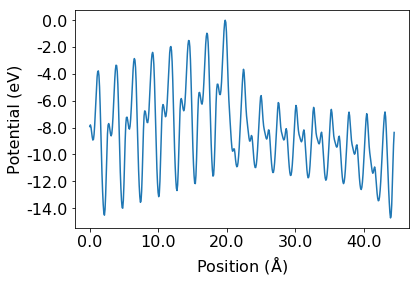

In [118]:
a = PlotPotential("/home/nadamski/ScN_het/test")


In [145]:
np.argmax(a[1][240:490])

12

In [113]:
14, 43, 73, 103, 133, 162, 192, 222; 281, 309, 338, 367, 396, 425, 454; 252, 484

NameError: name 'x' is not defined

In [133]:
(a[1][192]-a[1][14])/(a[0][192]-a[0][14])

0.17696437633243864

In [146]:
(a[1][454]-a[1][281])/(a[0][454]-a[0][281])

-0.08734998056939387

In [147]:
0.17696437633243864 - -0.08734998056939387

0.2643143569018325

In [156]:
0.2643143569018325e10 * 8.85e-12 / 1.6e-19

1.461988786613261e+17

In [37]:
relaxed = Structure.from_file('/home/nadamski/ScN_het/test/CONTCAR')


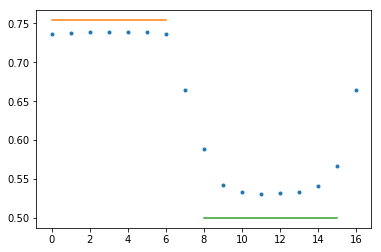

In [131]:
relaxed = Structure.from_file('/home/nadamski/ScN_het/test/CONTCAR')

u = [(relaxed[i+17].c-relaxed[i].c)/(relaxed[i+1].c-relaxed[i].c) for i in range(16)] +  [(relaxed[33].c-relaxed[16].c)/(1+relaxed[0].c-relaxed[16].c)]

plt.plot(u,'.')
plt.plot([0, 6], [0.754, 0.754])
plt.plot([8, 15], [0.5, 0.5])

In [132]:
u

[0.736943689051503,
 0.7381757082036567,
 0.7389811652364069,
 0.7393082154068767,
 0.7393432785209476,
 0.7388102250221259,
 0.7359278899605468,
 0.6645866401697371,
 0.5883527496026143,
 0.5427414438714049,
 0.5336445663372301,
 0.5312978790735736,
 0.5314813068271448,
 0.5334368750203048,
 0.5403687266505135,
 0.5665012312711666,
 0.6640335033810105]

In [96]:
(relaxed[i+17].c-relaxed[i].c)

0.03224817187713913

In [101]:
(0.3834646281116956 - 0.3077086441177236) / (0.3834646281116956 - 0.1865928834222176)

0.3847986622633963

In [111]:
#rsrs

GaSc = InitialGaN * [[1, 0, 0], [0, 1, 0], [0, 0, 36]]

cations = Sc * 18 + Ga * 18

A = [2/3, 1/3]
B = [1/3, 2/3]
C = [0, 0]

for at in [0, 2, 4, 6, 8, 10, 12, 14, 16]:
    GaSc[at] = 'Ga', A + [at*Ga/cations]
    GaSc[36+at] = 'N', B + [(at-0.2456)*Ga/cations]
for at in [1, 3, 5, 7, 9, 11, 13, 15, 17]:
    GaSc[at] = 'Ga', B + [at*Ga/cations]
    GaSc[36+at] = 'N', A + [(at-0.2456)*Ga/cations]

    
for at in [18, 21, 24, 27, 30, 33]:
    GaSc[at] = 'Sc', A + [(at-18)*Sc/cations + 18*Ga/cations]
    GaSc[36+at] = 'N', C + [(at-18.5)*Sc/cations + 18*Ga/cations]

for at in [19, 22, 25, 28, 31, 34]:
    GaSc[at] = 'Sc', C + [(at-18)*Sc/cations + 18*Ga/cations]
    GaSc[36+at] = 'N', B + [(at-18.5)*Sc/cations + 18*Ga/cations]

for at in [20, 23, 26, 29, 32, 35]:
    GaSc[at] = 'Sc', B + [(at-18)*Sc/cations + 18*Ga/cations]
    GaSc[36+at] = 'N', A + [(at-18.5)*Sc/cations + 18*Ga/cations]
    
GaSc[36] = 'N', C + [1 - 0.5*Sc/cations]
GaSc[54] = 'N', B + [(18-0.2456)*Ga/cations]


GaSc.to(fmt='poscar',filename='/home/nadamski/ScN_het/1818.vasp')

In [112]:
#rsrs

GaSc = InitialGaN * [[1, 0, 0], [0, 1, 0], [0, 0, 24]]

cations = Sc * 12 + Ga * 12

A = [2/3, 1/3]
B = [1/3, 2/3]
C = [0, 0]

for at in [0, 2, 4, 6, 8, 10]:
    GaSc[at] = 'Ga', A + [at*Ga/cations]
    GaSc[24+at] = 'N', B + [(at-0.2456)*Ga/cations]
for at in [1, 3, 5, 7, 9, 11]:
    GaSc[at] = 'Ga', B + [at*Ga/cations]
    GaSc[24+at] = 'N', A + [(at-0.2456)*Ga/cations]

    
for at in [12, 15, 18, 21]:
    GaSc[at] = 'Sc', A + [(at-12)*Sc/cations + 12*Ga/cations]
    GaSc[24+at] = 'N', C + [(at-12.5)*Sc/cations + 12*Ga/cations]

for at in [13, 16, 19, 22]:
    GaSc[at] = 'Sc', C + [(at-12)*Sc/cations + 12*Ga/cations]
    GaSc[24+at] = 'N', B + [(at-12.5)*Sc/cations + 12*Ga/cations]

for at in [14, 17, 20, 23]:
    GaSc[at] = 'Sc', B + [(at-12)*Sc/cations + 12*Ga/cations]
    GaSc[24+at] = 'N', A + [(at-12.5)*Sc/cations + 12*Ga/cations]
    
GaSc[24] = 'N', C + [1 - 0.5*Sc/cations]
GaSc[36] = 'N', B + [(12-0.2456)*Ga/cations]


GaSc.to(fmt='poscar',filename='/home/nadamski/ScN_het/1212.vasp')

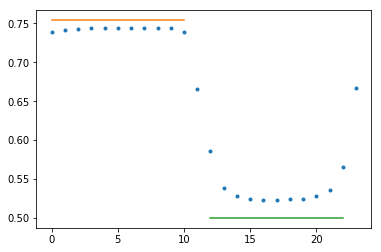

In [129]:
# N between two cations

relaxed = Structure.from_file('/home/nadamski/Ga12Sc12/CONTCAR')


u = np.array([(relaxed[i+24].c-relaxed[i].c)/(relaxed[i-1].c-relaxed[i].c) for i in range(1,24)] +  [(1+relaxed[0].c-relaxed[24].c)/(1+relaxed[0].c-relaxed[23].c)])
u = 1-u

plt.plot(u,'.')
plt.plot([0, 10], [0.754, 0.754])
plt.plot([12, 22], [0.5, 0.5])

In [130]:
u

array([0.7393547 , 0.74119936, 0.74252384, 0.74345357, 0.74380277,
       0.74431335, 0.74429739, 0.74436593, 0.74414722, 0.74342765,
       0.73947091, 0.66611345, 0.5862132 , 0.53879977, 0.52831425,
       0.52468303, 0.52353616, 0.52341799, 0.52377891, 0.52481119,
       0.52768129, 0.5364989 , 0.56532652, 0.6665904 ])

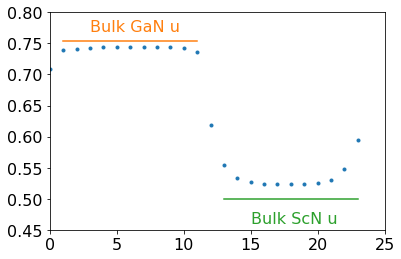

In [134]:
# Cation between two N
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

relaxed = Structure.from_file('/home/nadamski/Ga12Sc12/loc/CONTCAR')


u = np.array([(1+relaxed[0].c-relaxed[24].c)/(1+relaxed[25].c-relaxed[24].c)] + [(relaxed[i].c-relaxed[i+24].c)/(relaxed[i+25].c-relaxed[i+24].c) for i in range(1,23)] +  [(relaxed[23].c-relaxed[47].c)/(relaxed[24].c-relaxed[47].c)])
u = 1-u

plt.plot(u,'.')
plt.plot([1, 11], [0.754, 0.754])
plt.plot([13, 23], [0.5, 0.5])
ax.text(3, 0.77, 'Bulk GaN u', color='C1', fontsize=16)
ax.text(15, 0.46, 'Bulk ScN u', color='C2', fontsize=16)

plt.axis([0, 25, 0.45, 0.8])

ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=16) 

plt.show()


In [135]:
(u-0.5)/3 + 0.5
u

array([0.70884023, 0.74006602, 0.74147716, 0.7427358 , 0.74356908,
       0.74385446, 0.74432657, 0.74429208, 0.74437473, 0.74406508,
       0.74311563, 0.73664938, 0.61920711, 0.55427451, 0.53373138,
       0.52636607, 0.52403199, 0.52343255, 0.52355043, 0.52420689,
       0.52585858, 0.53062721, 0.54707772, 0.59399038])

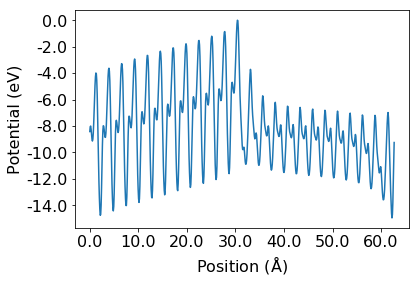

In [4]:
a = PlotPotential("/home/nadamski/Ga12Sc12/loc")


In [25]:
np.argmax(a[1][600:670])

26

In [15]:
(a[1][280]-a[1][44])/(a[0][280]-a[0][44])

0.11451550088788094

In [26]:
(a[1][626]-a[1][426])/(a[0][626]-a[0][426])

-0.0534768682489616

In [78]:
0.11451550088788094 - -0.0534768682489616


0.16799236913684254

In [36]:
a[0][280]

25.1150784

In [215]:
fac = relaxed[7].c - relaxed[5].c
for i in [5, 6, 29, 30]:
    print(1+(relaxed[i].c-relaxed[5].c)/fac)

1.0
1.4999772731494125
0.8718540428591226
1.3721397615609479


In [218]:
62.7876956003728708 * fac

5.295622149933208

In [326]:
relaxed.lattice

Lattice
    abc : 3.2013218230952276 3.2013218230952276 36.4432684157748
 angles : 90.0 90.0 119.99975728774625
 volume : 323.4503936117029
      A : -1.6006667837197268 -2.7724226341815377 0.0
      B : -1.6006667837197268 2.7724226341815377 0.0
      C : 0.0 0.0 -36.4432684157748

In [329]:
a = [-0.666666666667 * -1.6006667837197268 - 0.3333333333333 * -1.6006667837197268, -0.666666666667 * -2.7724226341815377 - 0.3333333333333 * 2.7724226341815377, 0.07071003299865453 * 36.4432684157748] 
b = [0.3333333333333 * -1.6006667837197268 + 0.666666666667  * -1.6006667837197268, 0.3333333333333 * -2.7724226341815377 + 0.666666666667  * 2.7724226341815377, 0.07071003299865453 * 36.4432684157748] 
c = [0.3333333333333 * -1.6006667837197268 - 0.3333333333333 * -1.6006667837197268, 0.3333333333333 * -2.7724226341815377 - 0.3333333333333 * 2.7724226341815377, 0.07071003299865453 * 36.4432684157748] 
print([a, b, c])

[[1.600666783720207, 0.9241408780615292, 2.5769047122582607], [-1.600666783720207, 0.9241408780615292, 2.5769047122582607], [0.0, -1.8482817561208402, 2.5769047122582607]]


In [323]:
relaxed[25].c - relaxed[24].c

0.07071003299865453

In [264]:
(relaxed[41].c - relaxed[15].c) / (relaxed[18].c -relaxed[15].c)

0.5079467399388315

In [265]:
ScN = Structure.from_file('/home/nadamski/POSCAR')


In [272]:
v = ScN.get_space_group_info()

In [273]:
v

('R3m', 160)

In [39]:
relaxed = Structure.from_file('/home/nadamski/Ga2Sc3/CONTCAR')
relaxed

Structure Summary
Lattice
    abc : 3.247717746836538 3.247717746836538 13.205408406067946
 angles : 90.0 90.0 119.99999484279076
 volume : 120.62547831880185
      A : -1.623859 -2.812606 0.0
      B : -1.623859 2.812606 0.0
      C : 0.0 0.0 -13.205408406067946
PeriodicSite: Ga (-1.6239, -0.9375, -10.4524) [0.6667, 0.3333, 0.7915]
PeriodicSite: Ga (-1.6239, 0.9375, 0.0651) [0.3333, 0.6667, -0.0049]
PeriodicSite: Sc (-1.6239, 0.9375, -7.6450) [0.3333, 0.6667, 0.5789]
PeriodicSite: Sc (0.0000, 0.0000, -5.0638) [-0.0000, -0.0000, 0.3835]
PeriodicSite: Sc (-1.6239, -0.9375, -2.4640) [0.6667, 0.3333, 0.1866]
PeriodicSite: N (-1.6239, 0.9375, -4.0634) [0.3333, 0.6667, 0.3077]
PeriodicSite: N (0.0000, 0.0000, -1.5068) [-0.0000, -0.0000, 0.1141]
PeriodicSite: N (-1.6239, -0.9375, -6.6761) [0.6667, 0.3333, 0.5056]
PeriodicSite: N (-1.6239, -0.9375, -12.3871) [0.6667, 0.3333, 0.9380]
PeriodicSite: N (-1.6239, 0.9375, -9.6955) [0.3333, 0.6667, 0.7342]

Text(2, 0.51, 'Ideal ScN u')

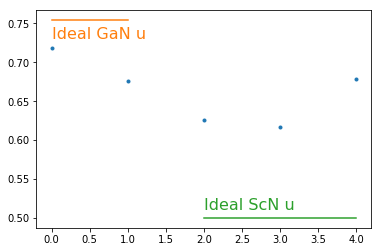

In [57]:
# Cation between two N

relaxed = Structure.from_file('/home/nadamski/Ga2Sc3/CONTCAR')


u = np.array([(relaxed[0].c-relaxed[9].c)/(relaxed[8].c-relaxed[9].c),
             (1+relaxed[1].c-relaxed[8].c)/(1+relaxed[6].c-relaxed[8].c),
             (relaxed[4].c-relaxed[6].c)/(relaxed[5].c-relaxed[6].c),
             (relaxed[3].c-relaxed[5].c)/(relaxed[7].c-relaxed[5].c),
             (relaxed[2].c-relaxed[7].c)/(relaxed[9].c-relaxed[7].c)])
u = 1-u
plt.plot(u,'.')
plt.plot([0, 1], [0.754, 0.754])
plt.plot([2, 4], [0.5, 0.5])
plt.text(0, 0.73, 'Ideal GaN u', color='C1', fontsize=16)
plt.text(2, 0.51, 'Ideal ScN u', color='C2', fontsize=16)

In [44]:
relaxed[-5].c

0.3077086441177236

In [101]:
a = np.array([-18.51532 + -1.37812, -16.03579 + -5.40524, -15.68158 + -5.96745, -7.64188 + -14.61889, -12.84779 + 4.97915 - 2.569560*6])
b = [16, 9, 8, 5, 0]

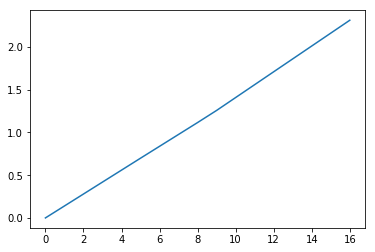

In [103]:
plt.plot(b, (a-a[-1])/np.linalg.det(np.dstack([x,y,z])) * 1.6e-19 / 1e-20)

In [91]:
x = [1.623864, 0.937546, 2.569560]
y = [-1.623864, 0.937546, 2.569560]
z = [0.000000, -1.875069, 2.569560]

In [97]:
(a-a[-1]) / np.linalg.det(np.dstack([x,y,z])) * 1.6e-19 / 1e-20


array([2.31259093, 1.11586589, 0.69886387, 0.        ])

In [98]:
np.linalg.det(np.dstack([x,y,z]))

array([23.47192459])

In [109]:
(0.666666666666666 - 0.5079467399388315) / (0.480376 - 0.333333)

1.079411646442431

In [110]:
1.079411646442431 * 2.31259093

2.496237583299133

In [115]:
ScNc = np.array([7.19454 + -0.81701, 9.44283 + -4.42443, 9.66766 + 4.22801 - 2.2482935084854385 * 4, 10.56698 + 2.79825 - 2.2482935084854385 * 4])

In [118]:
ScNc - ScNc[-1]
pos = [0.48, 0.38, 0.37, 0.33]

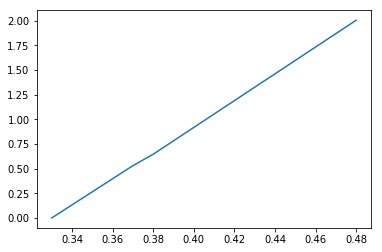

In [119]:
plt.plot(pos, ScNc - ScNc[-1])

In [128]:
x = [0.0, 2.2482935084854385, 2.2482935084854385]
y = [2.2482935084854385, 0.0, 2.2482935084854385]
z = [2.2482935084854385, 2.2482935084854385, 0.0]

(0.1666666) / 0.15 * np.sqrt(3) * (ScNc - ScNc[-1]) / np.linalg.det(np.dstack([x,y,z])) * 1.6e-19 / 1e-20


array([2.71685184, 0.87561392, 0.71859663, 0.        ])

In [127]:
np.sqrt(3) /2 /np.linalg.det(np.dstack([x,y,z])) * 1.6e-19 / 1e-20

array([0.60962336])

In [1]:
a = PlotPotential("/home/nadamski/Ga6Sc8/HSE/loc")


NameError: name 'PlotPotential' is not defined

In [20]:
a

([0.0,
  0.0902462725,
  0.180492545,
  0.2707388175,
  0.36098509,
  0.4512313625,
  0.541477635,
  0.6317239075000001,
  0.72197018,
  0.8122164525,
  0.902462725,
  0.9927089975,
  1.08295527,
  1.1732015425,
  1.2634478150000001,
  1.3536940874999999,
  1.44394036,
  1.5341866325000002,
  1.624432905,
  1.7146791775,
  1.80492545,
  1.8951717225,
  1.985417995,
  2.0756642675,
  2.16591054,
  2.2561568125,
  2.346403085,
  2.4366493575000003,
  2.5268956300000003,
  2.6171419025,
  2.7073881749999997,
  2.7976344475,
  2.88788072,
  2.9781269925,
  3.0683732650000004,
  3.1586195375,
  3.24886581,
  3.3391120825,
  3.429358355,
  3.5196046275,
  3.6098509,
  3.7000971724999996,
  3.790343445,
  3.8805897175,
  3.97083599,
  4.0610822625,
  4.151328535,
  4.2415748075,
  4.33182108,
  4.4220673525,
  4.512313625,
  4.6025598975,
  4.69280617,
  4.7830524425,
  4.873298715000001,
  4.963544987500001,
  5.053791260000001,
  5.1440375325,
  5.234283805,
  5.3245300774999995,
  5.414776

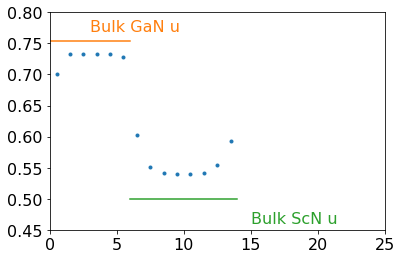

0.338206795877915 V/A


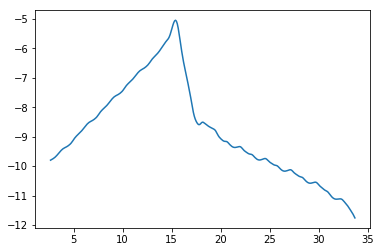

In [405]:
N = 29
vec = np.concatenate([np.ones(N), np.zeros(400 - N)], axis=0)
vec

avg = np.convolve(a[1], vec/N)

plt.plot(a[0][N:400-N], avg[N:400-N])
#plt.plot(a[0][31:300], np.diff(avg[30:300])/np.diff(a[0][30:300]))

E = np.diff(avg[N:400-N])/np.diff(a[0][N:400-N])
print(np.mean(E[20:107]), r'V/A')
#plt.plot(E[20:107])

In [215]:
len(a[1])

400

-0.15834559075350463


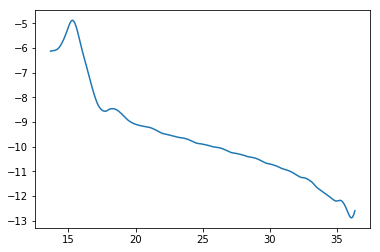

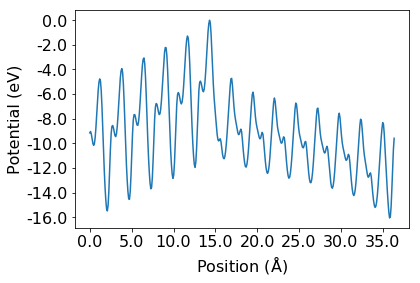

In [395]:
a = PlotPotential("/home/nadamski/Ga6Sc8/HSE/loc")


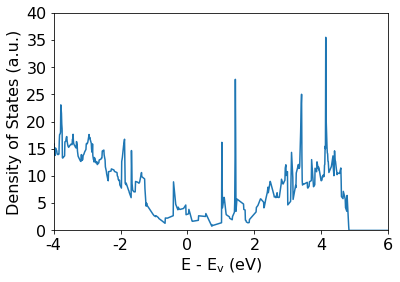

In [134]:
DoscarIn = !cat /home/nadamski/Ga6Sc8/HSE/DOS/DOSCAR
vecs = [[float(j) for j in DoscarIn[i].split()] for i in range(6,3004)]
#vecs = np.array([map(float, DoscarIn[i].split()) for i in range(6,3005)])
x = np.array([i[0] for i in vecs])-5.2616
y = [i[1] for i in vecs]
z = np.array([i[2] for i in vecs])
fig = plt.figure()
ax = plt.subplot(111)


plt.plot(x[1900:], y[1900:])
plt.axis([-4, 6, 0, 40])
plt.xlabel(r'E - $\rm E_v$ (eV)', fontsize=16)
ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=16)
plt.ylabel('Density of States (a.u.)', fontsize=16)
ax.set_yticklabels(ax.get_yticks().astype(int), fontsize=16)

plt.savefig('Ga6Sc8HSE_DOS.png', bbox_inches='tight', format='png', dpi=300)

#plt.plot(x[1000:]- 5,z[1000:])
plt.show()

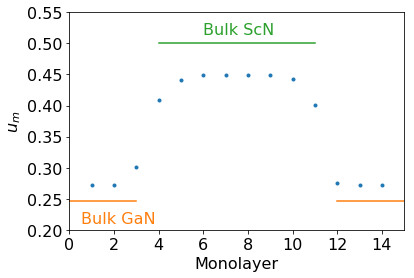

In [147]:
# Cation between two N
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

relaxed = Structure.from_file('/home/nadamski/Ga6Sc8/HSE/loc/CONTCAR')


u = np.array([(1+relaxed[0].c-relaxed[14].c)/(1+relaxed[15].c-relaxed[14].c)] + [(relaxed[i].c-relaxed[i+14].c)/(relaxed[i+15].c-relaxed[i+14].c) for i in range(1,13)] +  [(relaxed[13].c-relaxed[27].c)/(relaxed[14].c-relaxed[27].c)])

u2 = list(u)*2

plt.plot(np.arange(1, 15, 1), u2[3:17][::-1],'.')
plt.plot([0, 3], [0.246, 0.246], 'C1')
plt.plot([12, 15], [0.246, 0.246], 'C1')
plt.plot([4, 11], [0.5, 0.5], 'C2')
ax.text(0.5, 0.21, 'Bulk GaN', color='C1', fontsize=16)
ax.text(6, 0.515, 'Bulk ScN', color='C2', fontsize=16)

plt.ylabel(r'$u_{m}$', fontsize=16)
plt.xlabel(r'Monolayer', fontsize=16)


plt.axis([0, 15, 0.2, 0.55])

ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=16) 


plt.savefig('GaN_ScN_hse.png', bbox_inches='tight', format='png', dpi=300)

plt.show()


In [196]:
-0.15834559075350463


In [154]:
np.size(locpot3.data['total'])/400

1296.0

In [137]:
u.

array([0.69940087, 0.72821616, 0.72826925, 0.7285914 , 0.72842028,
       0.72508513, 0.59869004, 0.55680923, 0.55156561, 0.5507717 ,
       0.55078013, 0.55150007, 0.5587844 , 0.59032477])

In [121]:
VB_GaN = 2.062341
CB_GaN = 5.245465


In [122]:
GX = !cat ~/remote/cori/work/copyscratch/ScN/ScN_rs/bandstr/GX1/EIGENVAL


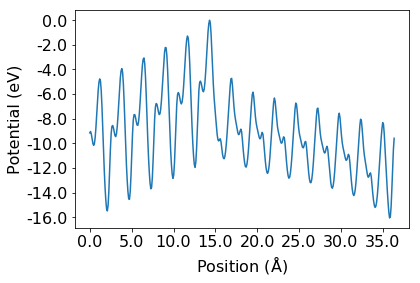

In [123]:
a = PlotPotential("/home/nadamski/Ga6Sc8/HSE/loc")



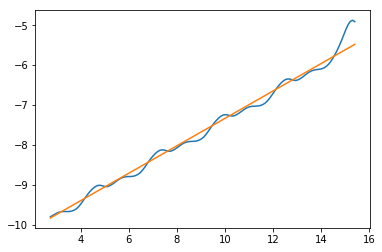

In [124]:
int1 = 170

plt.plot(a[0][30:int1], avg[30:int1])
plt.plot(a[0][30:int1], np.array(a[0][30:int1]) * 0.34354054590757643-10.77)

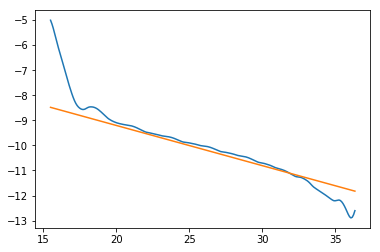

In [125]:
plt.plot(a[0][int1:400], avg[int1:400])
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * -0.16021501211786085-6)

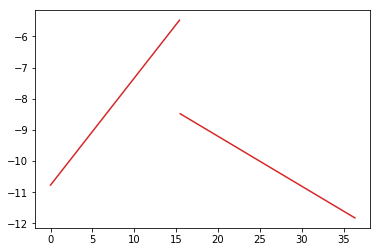

In [126]:
#Electrostatic
plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * 0.34354054590757643-10.77, 'C3')
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * -0.16021501211786085-6, 'C3')

In [133]:
GaN = np.array(a[0][0:int1]) * 0.34354054590757643-10.77
ScN = np.array(a[0][int1:400]) * -0.16021501211786085-6

In [137]:
print(GaN[0], GaN[-1], ScN[0], ScN[-1])
print(GaN[0]+VB_GaN - ScN[-1] - VB_ScN)

-10.77 -5.4804097725235925 -8.481472415299642 -11.824161727673864
-2.0273712723261355


[0, 36.352159830000005, -9, 0]

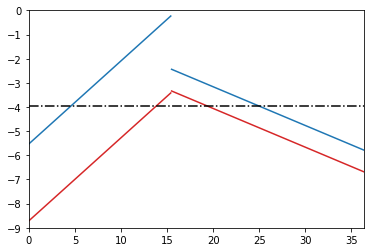

In [127]:
#using bulk CB
plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * 0.34354054590757643-10.77+VB_GaN, 'C3')
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * -0.16021501211786085-6+VB_ScN, 'C3')

#using bulk VB
plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * 0.34354054590757643-10.77+CB_GaN, 'C0')
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * -0.16021501211786085-6+CB_ScN, 'C0')

plt.plot([0, a[0][-1]], [np.mean(a[1])+5.26493614, np.mean(a[1])+5.26493614], 'k-.')

plt.axis([0, a[0][-1], -9, 0])

In [198]:
np.mean(a[1])

-9.236680125661852

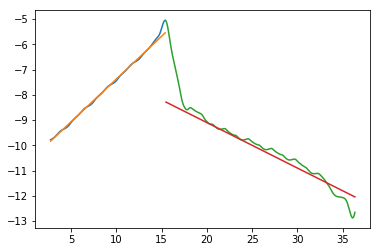

In [407]:
int1 = 170

plt.plot(a[0][30:int1], avg[30:int1])
plt.plot(a[0][30:int1], np.array(a[0][30:int1]) * 0.3386312584386698-10.76)

plt.plot(a[0][int1:400], avg[int1:400])
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * -0.18-5.5)

plt.savefig('temp.png', bbox_inches='tight', format='png', dpi=300)


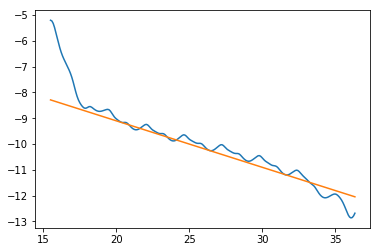

In [254]:
plt.plot(a[0][int1:400], avg[int1:400])
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * -0.18-5.5)

-0.18617684234929419


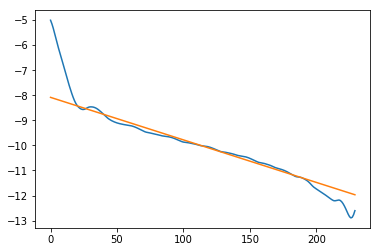

In [115]:
N = 28
vec = np.concatenate([np.ones(N), np.zeros(400 - N)], axis=0)
vec
A = 210
B = 353
avg = np.convolve(a[1], vec/N)
plt.plot(avg[int1:400])
#plt.plot(np.diff(avg[254:313])/np.diff(a[0][254:313]))
E = np.diff(avg[A:B])/np.diff(a[0][A:B])
print(np.mean(E))
#lt.plot(E[100:180])

plt.plot(np.array(a[0][int1:400]) * np.mean(E)-5.2)

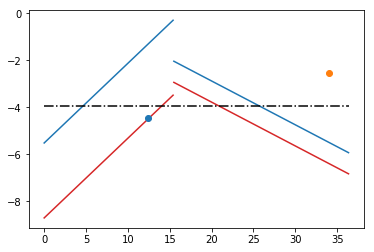

In [427]:
EGaN = 0.3386312584386698
EScN = -0.18617684234929419
dScN = -5.2
#using bulk CB
plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * EGaN-10.76+VB_GaN, 'C3')
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * EScN+dScN+VB_ScN, 'C3')

#using bulk VB
plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * EGaN-10.76+CB_GaN, 'C0')
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * EScN+dScN+CB_ScN, 'C0')

#plt.plot(a[0][0:int1]+a[0][-1], np.array(a[0][0:int1]) * EGaN-10.76+CB_GaN, 'C0')
#plt.plot(a[0][0:int1]+a[0][-1], np.array(a[0][0:int1]) * EGaN-10.76+VB_GaN, 'C3')

plt.plot(12.411,[np.mean(a[1])+4.75], 'o' )
plt.plot([34.0686],[np.mean(a[1])+6.69], 'o' )


plt.plot([0, a[0][-1]], [np.mean(a[1])+5.26493614, np.mean(a[1])+5.26493614], 'k-.')

plt.savefig('temp.png', bbox_inches='tight', format='png', dpi=300)


#plt.plot(a[0], a[1], color='C1', alpha=0.1)
#plt.axis([0, a[0][-1], -9, 0])


In [426]:
0.34057 * 36.4432684157748028

12.411483924360423

In [292]:
np.amax(np.array(a[0][0:int1]) * EGaN-10.76+CB_GaN)

-0.3005344498666185

In [293]:
np.amax(np.array(a[0][int1:400]) * EScN+dScN+CB_ScN)

-2.0415203384798577

In [299]:
a[0][170]/-36.4432684157748028

-0.4249999951512502

In [313]:
fac = relaxed[2].c - relaxed[4].c
for i in [2, 3, 16, 17]:
    print(1+(relaxed[i].c-relaxed[16].c)/fac)

0.8640898875881409
0.36413990830960696
1.0
0.4998353575197103


In [314]:
fac * -36.4432684157748028

5.240522656013242

In [308]:
3.99451 / 7.72811

0.5168805827039211

In [322]:
(relaxed[24].c-relaxed[11].c)/(relaxed[8].c - relaxed[11].c)

0.48311890640723537

In [321]:
relaxed[24].c

0.6918489098814717

In [391]:
InitialGaN = Structure.from_file('/home/nadamski/init.vasp')


In [394]:

GaSc = InitialGaN * [[1, 0, 0], [0, 1, 0], [0, 0, 24]]

cations = Ga*24

A = [2/3, 1/3]
B = [1/3, 2/3]
C = [0, 0]

for at in [0, 2, 4, 6, 8, 10]:
    GaSc[at] = 'Ga', A + [at*Ga/cations]
    GaSc[24+at] = 'N', B + [(at-0.2456)*Ga/cations]
for at in [1, 3, 5, 7, 9, 11]:
    GaSc[at] = 'Ga', B + [at*Ga/cations]
    GaSc[24+at] = 'N', A + [(at-0.2456)*Ga/cations]

    
for at in [12, 14, 16, 18, 20, 22]:
    GaSc[at] = 'Al', A + [at*Ga/cations]
    GaSc[24+at] = 'N', B + [(at-0.2456)*Ga/cations]

for at in [13, 15, 17, 19, 21, 23]:
    GaSc[at] = 'Al', B + [at*Ga/cations]
    GaSc[24+at] = 'N', A + [(at-0.2456)*Ga/cations]


GaSc.to(fmt='poscar',filename='/home/nadamski/Ga6Sc8/Ga_Al12.vasp')

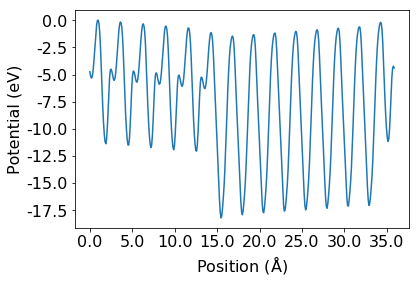

In [428]:
a = PlotPotential("/home/nadamski/test/test/")



-0.06995639438960868 V/A
0.06905223824099312


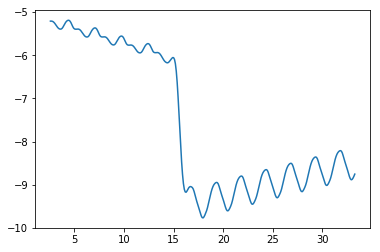

In [429]:
N = 29
vec = np.concatenate([np.ones(N), np.zeros(400 - N)], axis=0)
vec

avg = np.convolve(a[1], vec/N)

plt.plot(a[0][N:400-N], avg[N:400-N])
#plt.plot(a[0][31:300], np.diff(avg[30:300])/np.diff(a[0][30:300]))

E = np.diff(avg[30:300])/np.diff(a[0][30:300])
print(np.mean(E[20:107]), r'V/A')

A = 210
B = 355
E = np.diff(avg[A:B])/np.diff(a[0][A:B])
print(np.mean(E))
#lt.plot(E[100:180])
#plt.plot(E[20:107])

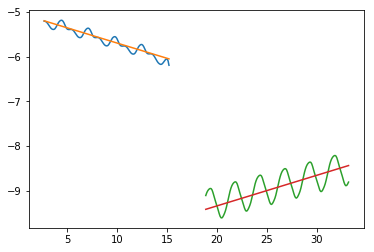

In [433]:
int1 = 170

plt.plot(a[0][30:int1], avg[30:int1])
plt.plot(a[0][30:int1], np.array(a[0][30:int1]) * -0.068-5.02)

plt.plot(a[0][A:370], avg[A:370])
plt.plot(a[0][A:370], np.array(a[0][A:370]) * 0.06834225286670668-10.7)

plt.savefig('temp.png', bbox_inches='tight', format='png', dpi=300)


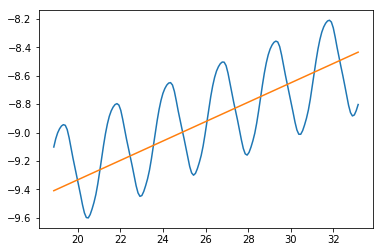

In [431]:
plt.plot(a[0][A:370], avg[A:370])
plt.plot(a[0][A:370], np.array(a[0][A:370]) * 0.06834225286670668-10.7)

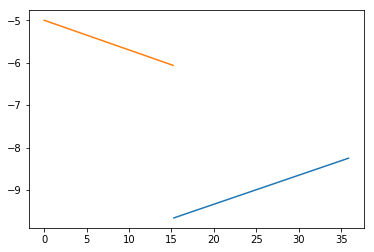

In [365]:
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * 0.06834225286670668-10.7)
plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * -0.06995639438960868-5)

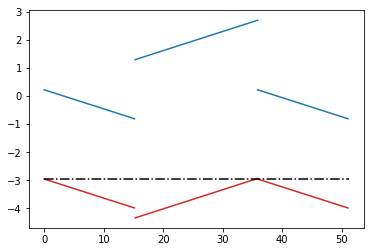

In [448]:
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * 0.06834225286670668-10.7+VB_AlN, color='C3')
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * 0.06834225286670668-10.7+CB_AlN, color='C0')
plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * -0.068-5.02+VB_GaN, color='C3')
plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * -0.068-5.02+CB_GaN, color='C0')
plt.plot(a[0][0:int1]+a[0][-1], np.array(a[0][0:int1]) * -0.068-5.02+VB_GaN, color='C3')
plt.plot(a[0][0:int1]+a[0][-1], np.array(a[0][0:int1]) * -0.068-5.02+CB_GaN, color='C0')

plt.plot([0, a[0][-1]+a[0][int1]], [np.mean(a[1])+4.46293601, np.mean(a[1])+4.46293601], 'k-.')


plt.savefig('temp.png', bbox_inches='tight', format='png', dpi=300)


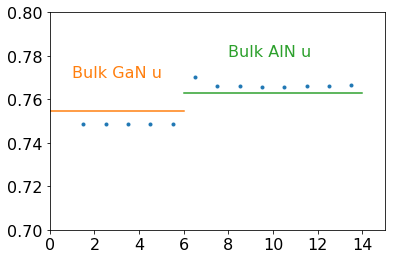

In [446]:
# Cation between two N
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

relaxed = Structure.from_file('/home/nadamski/GaAl/CONTCAR')


u = np.array([(1+relaxed[0].c-relaxed[14].c)/(1+relaxed[15].c-relaxed[14].c)] + [(relaxed[i].c-relaxed[i+14].c)/(relaxed[i+15].c-relaxed[i+14].c) for i in range(1,13)] +  [(relaxed[13].c-relaxed[27].c)/(relaxed[14].c-relaxed[27].c)])
u = 1-u

plt.plot(np.arange(0.5, 14.5, 1), u,'.')
plt.plot([0, 6], [0.3774*2, 0.3774*2])
plt.plot([6, 14], [0.38154*2, 0.38154*2])
ax.text(1, 0.77, 'Bulk GaN u', color='C1', fontsize=16)
ax.text(8, 0.78, 'Bulk AlN u', color='C2', fontsize=16)

plt.axis([0, 15, 0.7, 0.8])

ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=16) 


plt.savefig('GaN_AlN_hse.png', bbox_inches='tight', format='png', dpi=300)

plt.show()


In [439]:
0.8782700072642027 - 0.4967299927357973

0.38154001452840536

In [445]:
0.8770187094116295 - 0.4995750046824270

0.3774437047292025

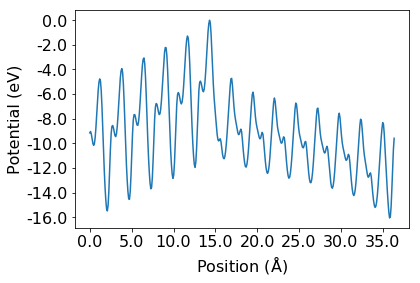

In [72]:
a = PlotPotential("/home/nadamski/Ga6Sc8/HSE/loc")

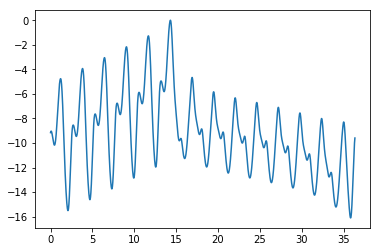

In [73]:
N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)
plt.plot(x,cub(x))

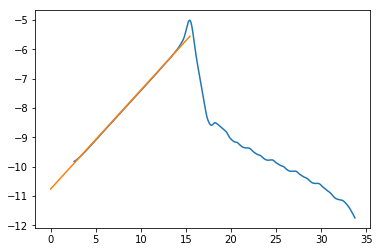

In [74]:
N = 2883
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

plt.plot(x[N:N2-N], avgl[N:N2-N])
#plt.plot(x[N:N2-N-1], np.diff(avgl[N:N2-N])/np.diff(x[N:N2-N]))

plt.plot(x[0:17000], x[0:17000] * 0.33703066108275204-10.76)


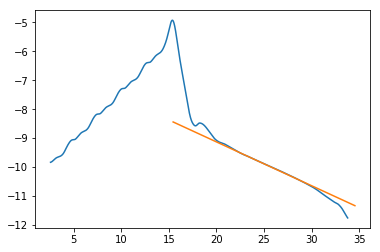

In [75]:
N = 2835
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)

avgr = np.convolve(cub(x), vec/N)

plt.plot(x[N:N2-N], avgr[N:N2-N])

#plt.plot(x[N:N2-N-1], np.diff(avgr[N:N2-N])/np.diff(x[N:N2-N]))

plt.plot(x[17000:38000], x[17000:38000] *  -0.15154189834820178 -6.1)


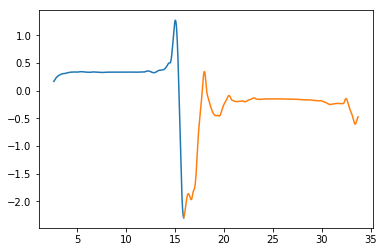

In [76]:
F = 17500
N = 2884

E_l = np.diff(avgl[N:F])/np.diff(x[N:F])
plt.plot(x[N:F-1], E_l)

E_r = np.diff(avgr[F:N2-N])/np.diff(x[F:N2-N])
plt.plot(x[F:N2-N-1], E_r)



0.33703066108275204

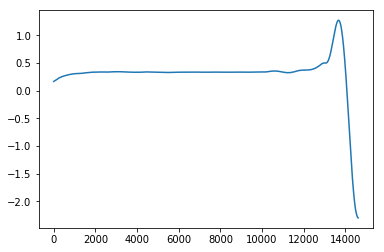

In [77]:
plt.plot(E_l)
np.mean(E_l[4000:10000])

-0.15154189834820214

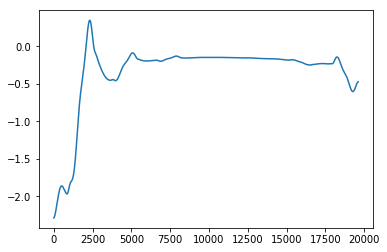

In [78]:
plt.plot(E_r)
np.mean(E_r[8500:14000])

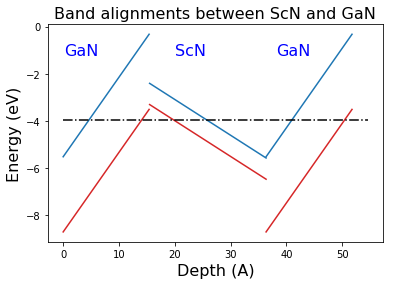

In [120]:
EGaN = 0.33703066108275204
EScN = -0.15154189834820178


VB_AlN = 5.310989
CB_AlN = 10.955536


VB_GaN = 2.062341
CB_GaN = 5.245465

VB_ScN = 5.143874
CB_ScN = 6.042059

dGaN = -10.76
dScN = -6.1
#using bulk CB
int1 = 170

plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * EGaN+dGaN+VB_GaN, 'C3')
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * EScN+dScN+VB_ScN, 'C3')

#using bulk VB
plt.plot(a[0][0:int1], np.array(a[0][0:int1]) * EGaN+dGaN+CB_GaN, 'C0')
plt.plot(a[0][int1:400], np.array(a[0][int1:400]) * EScN+dScN+CB_ScN, 'C0')

plt.plot(a[0][0:int1]+a[0][-1], np.array(a[0][0:int1]) * EGaN+dGaN+CB_GaN, 'C0')
plt.plot(a[0][0:int1]+a[0][-1], np.array(a[0][0:int1]) * EGaN+dGaN+VB_GaN, 'C3')

#plt.plot(12.411,[np.mean(a[1])+4.75], 'o' )
#plt.plot([34.0686],[np.mean(a[1])+6.69], 'o' )


plt.plot([0, a[0][-1]*3/2], [np.mean(a[1])+5.26493614, np.mean(a[1])+5.26493614], 'k-.')

plt.savefig('temp.png', bbox_inches='tight', format='png', dpi=300)

plt.text(0.09, -1.2, r'GaN', color='b', fontsize=16)
plt.text(20.09, -1.2, r'ScN', color='b', fontsize=16)
plt.text(38.09, -1.2, r'GaN', color='b', fontsize=16)


plt.xlabel(r'Depth (A)', fontsize=16)
plt.ylabel(r'Energy (eV)', fontsize=16)
plt.title('Band alignments between ScN and GaN', fontsize=16)
plt.savefig('ScNGaN68.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

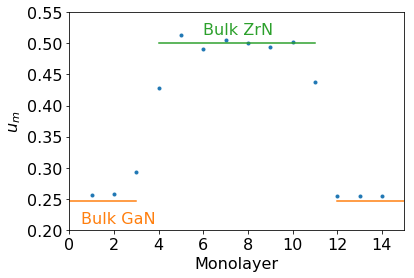

In [83]:
# Cation between two N
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

relaxed = Structure.from_file('/home/nadamski/CONTCAR')


u = np.array([(1+relaxed[0].c-relaxed[14].c)/(1+relaxed[15].c-relaxed[14].c)] + [(relaxed[i].c-relaxed[i+14].c)/(relaxed[i+15].c-relaxed[i+14].c) for i in range(1,13)] +  [(relaxed[13].c-relaxed[27].c)/(relaxed[14].c-relaxed[27].c)])

u2 = list(u)*2

plt.plot(np.arange(1, 15, 1), u2[3:17][::-1],'.')
plt.plot([0, 3], [0.246, 0.246], 'C1')
plt.plot([12, 15], [0.246, 0.246], 'C1')
plt.plot([4, 11], [0.5, 0.5], 'C2')
ax.text(0.5, 0.21, 'Bulk GaN', color='C1', fontsize=16)
ax.text(6, 0.515, 'Bulk ZrN', color='C2', fontsize=16)

plt.ylabel(r'$u_{m}$', fontsize=16)
plt.xlabel(r'Monolayer', fontsize=16)


plt.axis([0, 15, 0.2, 0.55])

ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=16) 


plt.savefig('ZrN.png', bbox_inches='tight', format='png', dpi=300)

plt.show()


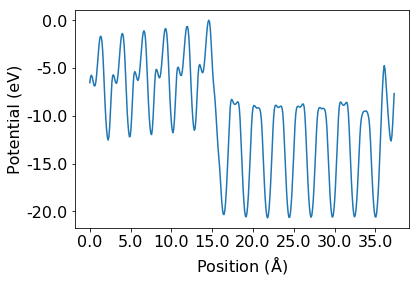

In [34]:
a = PlotPotential("/home/nadamski/")


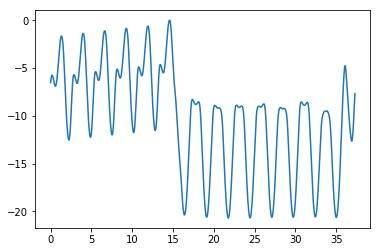

In [13]:
N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)
plt.plot(x,cub(x))

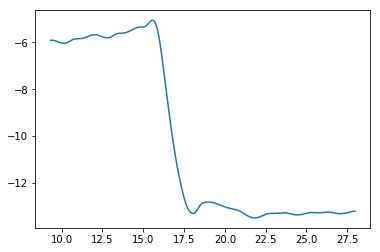

In [42]:
N = 2890
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

plt.plot(x[N2//4:3*N2//4], avgl[N2//4:3*N2//4])
#plt.plot(x[N:N2-N-1], np.diff(avgl[N:N2-N])/np.diff(x[N:N2-N]))

#plt.plot(x[0:17000], x[0:17000] * 0.33703066108275204-10.76)


In [36]:
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)

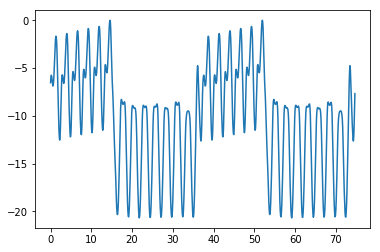

In [37]:
plt.plot(a[0],a[1])

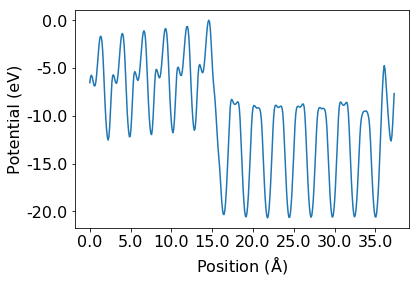

In [47]:
a = PlotPotential("/home/nadamski/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)


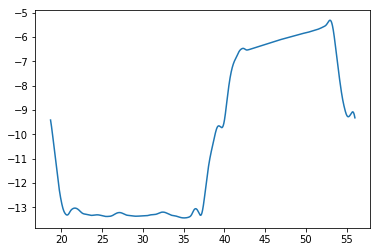

In [66]:

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 2835
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

plt.plot(x[N2//4:3*N2//4], avgl[N2//4:3*N2//4])


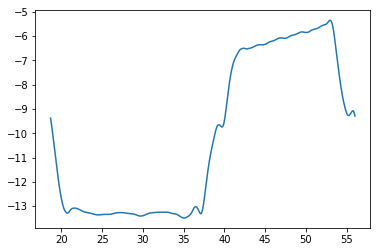

In [82]:

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 2855
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

plt.plot(x[N2//4:3*N2//4], avgl[N2//4:3*N2//4])


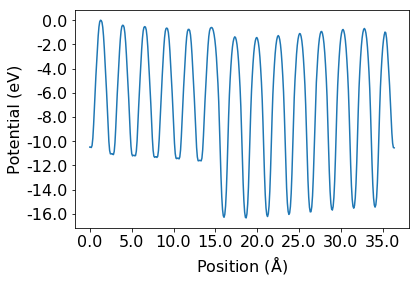

In [85]:
a = PlotPotential("/home/nadamski/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)


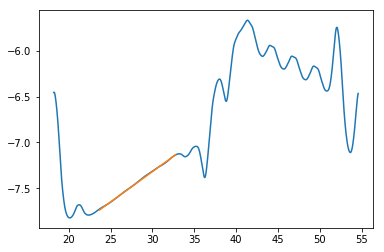

In [154]:
#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 2830
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x[L:R], avgl[L:R])

xvals =  x[13000:18000]
efield = 0.093 / (2 + 8.9 + 5) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-9.3)


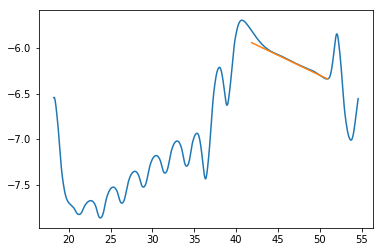

In [140]:
#GaN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 2880
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x[L:R], avgl[L:R])

xvals =  x[23000:28000]
efield = -0.093 / (2 + 8.9 + 13) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-4.1)

In [99]:
1e9

1000000000.0

In [158]:
0.093 / (2 + 8.9 + 12.9) / 8.85e-12 / 1e10

0.04415325452214784

In [101]:
1e8

100000000.0

In [155]:
0.093 / (2 + 8.9 + 5) / 8.85e-12 / 1e10

0.06609103507088795

In [157]:
-0.093 / (2 + 8.9 + 13) / 8.85e-12 / 1e10

-0.04396851287142756

In [164]:

GaSc = InitialGaN * [[1, 0, 0], [0, 1, 0], [0, 0, 16]]

Ga = 1 - 0.7929880000000011
Sc = 1 - 0.7929880000000011


cations =  Ga * 16

A = [2/3, 1/3]
B = [1/3, 2/3]
C = [0, 0]

for at in [0, 2, 4, 6]:
    GaSc[at] = 'Ga', A + [at*Ga/cations]
    GaSc[16+at] = 'N', B + [at*Ga/cations]
for at in [1, 3, 5, 7]:
    GaSc[at] = 'Ga', B + [at*Ga/cations]
    GaSc[16+at] = 'N', A + [at*Ga/cations]

    
for at in [8, 11, 14]:
    GaSc[at] = 'Sc', A + [(at-8)*Sc/cations + 8*Ga/cations]
    GaSc[16+at] = 'N', C + [(at-8)*Sc/cations + 8*Ga/cations]

for at in [15, 9, 12]:
    GaSc[at] = 'Sc', C + [(at-8)*Sc/cations + 8*Ga/cations]
    GaSc[16+at] = 'N', B + [(at-8)*Sc/cations + 8*Ga/cations]

for at in [10, 13]:
    GaSc[at] = 'Sc', B + [(at-8)*Sc/cations + 8*Ga/cations]
    GaSc[16+at] = 'N', A + [(at-8)*Sc/cations + 8*Ga/cations]
    
GaSc[16] = 'N', C + [0]
GaSc[24] = 'N', B + [0.5]


GaSc.to(fmt='poscar',filename='/home/nadamski/Ga6Sc8/88.vasp')

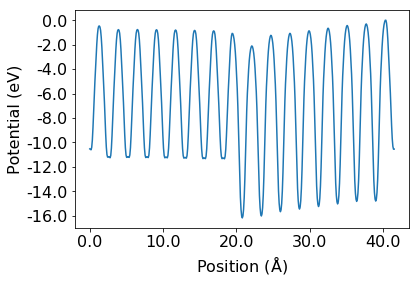

In [166]:
a = PlotPotential("/home/nadamski/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)


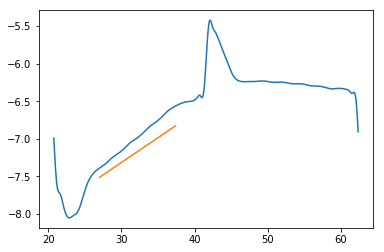

In [181]:
#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x[L:R], avgl[L:R])

xvals =  x[13000:18000]
efield = 0.093 / (2 + 8.9 + 5) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-9.3)


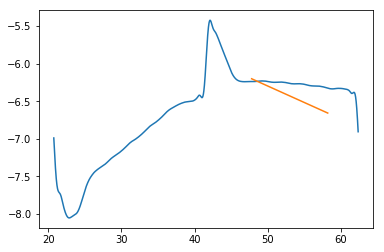

In [184]:
#GaN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x[L:R], avgl[L:R])

xvals =  x[23000:28000]
efield = -0.093 / (2 + 8.9 + 13) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-4.1)

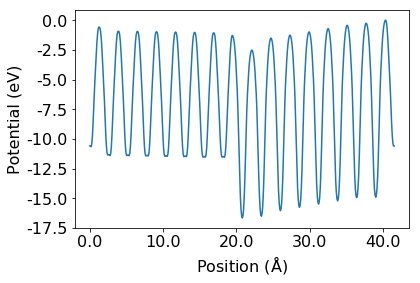

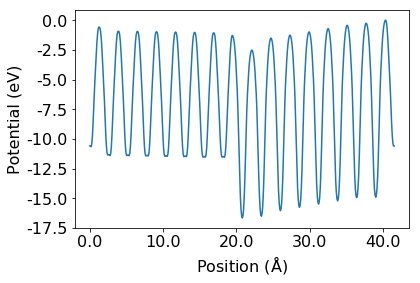

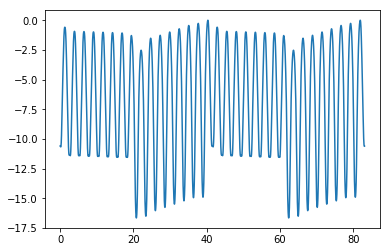

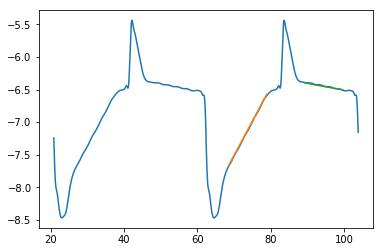

In [247]:
a = PlotPotential("/home/nadamski/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)

plt.show()


N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

plt.plot(x, cub(x))
plt.show()

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[13000:18000]
efield = 0.093 / (10) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals+x[2*L], efield-10.5) #ScN


xvals =  x[23000:28000]
efield = -0.093 / (2 + 8.9 + 90) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals+x[2*L], efield-5.9) #GaN

plt.show()



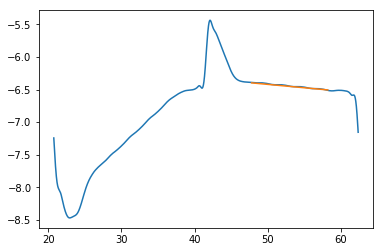

In [214]:
#GaN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x[L:R], avgl[L:R])

xvals =  x[23000:28000]
efield = -0.093 / (2 + 8.9 + 90) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-5.9)

In [216]:
-0.093 / (2 + 8.9 + 90) / 8.85e-12 / 1e10 

-0.010414741899178579

In [217]:
0.093 / (10) / 8.85e-12 / 1e10

0.10508474576271185

In [218]:
-0.093 / (2 + 8.9 + 13) / 8.85e-12 / 1e10 

-0.04396851287142756

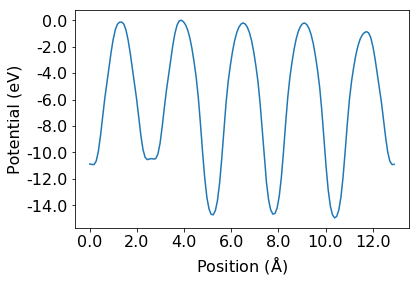

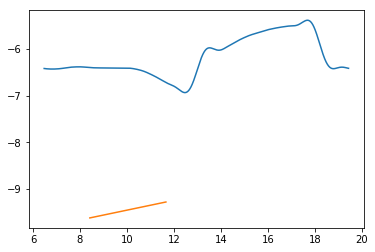

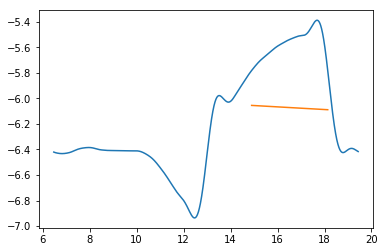

In [11]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga2_Sc3_PBE")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 4000
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x[L:R], avgl[L:R])

xvals =  x[13000:18000]
efield = 0.093 / (10) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-10.5)
plt.show()

#GaN

plt.plot(x[L:R], avgl[L:R])

xvals =  x[23000:28000]
efield = -0.093 / (2 + 8.9 + 90) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-5.9)
plt.show()


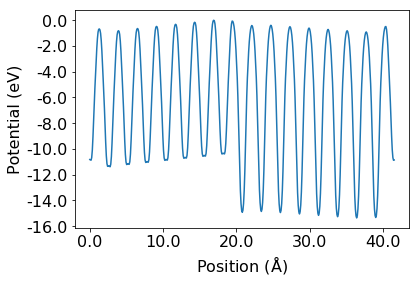

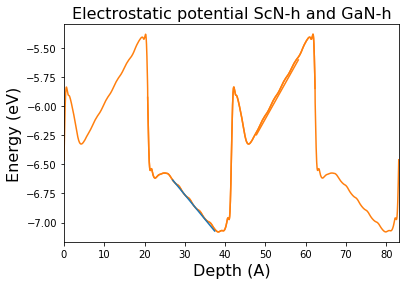

In [149]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0000/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]), 'C1')
plt.plot(x -x[L], list(avgl[L:R])+ list(avgl[L:R]), 'C1')

plt.xlim([a[0][0], a[0][-1]])

xvals =  x[13000:18000]
efield = -0.093 / (25) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-5.5) #ScN


xvals =  x[23000:28000]
efield = 0.093 / (2 + 15) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-9.2) #GaN

plt.xlabel(r'Depth (A)', fontsize=16)
plt.ylabel(r'Energy (eV)', fontsize=16)
plt.title('Electrostatic potential ScN-h and GaN-h', fontsize=16)
plt.savefig('Ga8Sc8_hex.png', bbox_inches='tight', format='png', dpi=300)
plt.show()


In [153]:
CB_Sc

6.598293

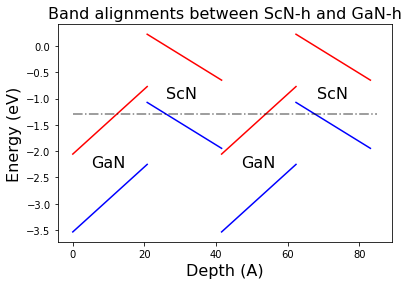

In [158]:
#plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[10000:20000]
efield = -0.093 / (25) / 8.85e-12 / 1e10 * xvals


plt.plot(xvals+x[2*L], efield-5.5+VB_Sc,'b') #ScN
plt.plot(xvals+x[2*L], efield-5.5+CB_Sc,'r') #ScN


plt.plot(xvals, efield-5.5+VB_Sc,'b') #ScN
plt.plot(xvals, efield-5.5+CB_Sc,'r') #ScN


xvals =  x[20000:30000]
efield = 0.093 / (2 + 15) / 8.85e-12 / 1e10 * xvals


plt.plot(xvals-x[2*L], efield-9.2+VB_Ga,'b') #GaN
plt.plot(xvals-x[2*L], efield-9.2+CB_Ga,'r') #GaN


plt.plot(xvals, efield-9.2+VB_Ga,'b') #GaN
plt.plot(xvals, efield-9.2+CB_Ga,'r') #GaN

plt.plot([0, 85], [-1.2918, -1.2918], 'k-.', alpha=0.5)

plt.text(5.09, -2.3, r'GaN', color='k', fontsize=16)
plt.text(26.09, -1.0, r'ScN', color='k', fontsize=16)
plt.text(47.09, -2.3, r'GaN', color='k', fontsize=16)
plt.text(68.09, -1.0, r'ScN', color='k', fontsize=16)


plt.xlabel(r'Depth (A)', fontsize=16)
plt.ylabel(r'Energy (eV)', fontsize=16)
plt.title('Band alignments between ScN-h and GaN-h', fontsize=16)
plt.savefig('Ga8Sc8_hex.png', bbox_inches='tight', format='png', dpi=300)
plt.show()
#STAGGERED GAP

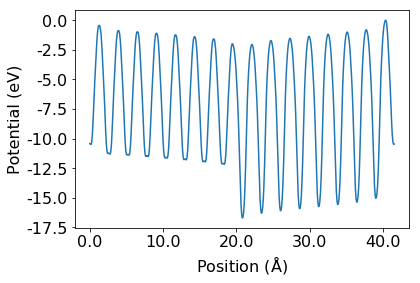

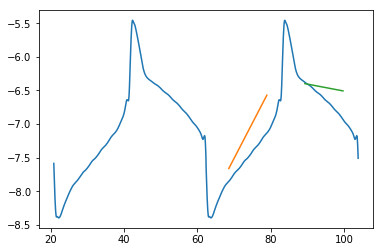

In [119]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0033/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[13000:18000]
efield = 0.093 / (10) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals+x[2*L], efield-10.5) #ScN


xvals =  x[23000:28000]
efield = -0.093 / (2 + 8.9 + 90) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals+x[2*L], efield-5.9) #GaN

plt.show()


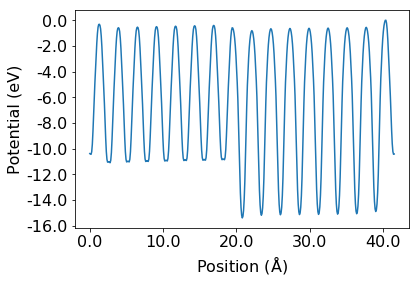

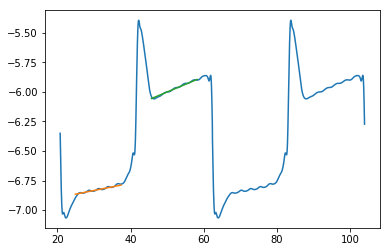

In [140]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0012/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[12000:18000]
efield = 0.093 / (170) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-7.02) #ScN


xvals =  x[22000:28000]
efield = 0.093 / (2 + 8.9 + 70) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield-6.65) #GaN

plt.show()


In [147]:
VB_Ga = 3.095894
CB_Ga = 4.576501

VB_Sc = 5.301498
CB_Sc = 6.598293

VB_Al = 4.746871
CB_Al = 10.278848

Efermi0012 = 4.9058

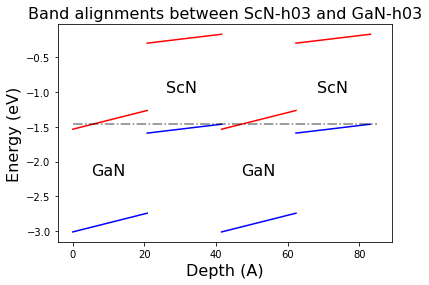

In [159]:
#plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[10000:20000]
efield = 0.093 / (170) / 8.85e-12 / 1e10 * xvals


plt.plot(xvals+x[2*L], efield-7.02+VB_Sc,'b') #ScN
plt.plot(xvals+x[2*L], efield-7.02+CB_Sc,'r') #ScN


plt.plot(xvals, efield-7.02+VB_Sc,'b') #ScN
plt.plot(xvals, efield-7.02+CB_Sc,'r') #ScN


xvals =  x[20000:30000]
efield = 0.093 / (2 + 8.9 + 70) / 8.85e-12 / 1e10 * xvals


plt.plot(xvals-x[2*L], efield-6.65+VB_Ga,'b') #GaN
plt.plot(xvals-x[2*L], efield-6.65+CB_Ga,'r') #GaN


plt.plot(xvals, efield-6.65+VB_Ga,'b') #GaN
plt.plot(xvals, efield-6.65+CB_Ga,'r') #GaN

plt.plot([0, 85], [-1.4544, -1.4544], 'k-.', alpha=0.5)

plt.text(5.09, -2.2, r'GaN', color='k', fontsize=16)
plt.text(26.09, -1.0, r'ScN', color='k', fontsize=16)
plt.text(47.09, -2.2, r'GaN', color='k', fontsize=16)
plt.text(68.09, -1.0, r'ScN', color='k', fontsize=16)


plt.xlabel(r'Depth (A)', fontsize=16)
plt.ylabel(r'Energy (eV)', fontsize=16)
plt.title('Band alignments between ScN-h03 and GaN-h03', fontsize=16)
plt.savefig('Ga8Sc8_hex.png', bbox_inches='tight', format='png', dpi=300)
plt.show()
#STAGGERED GAP

In [65]:
np.mean(a[1]) + 4.9058

-1.4544553798265243

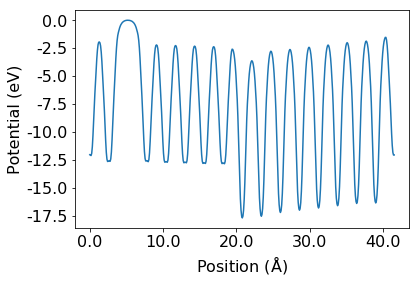

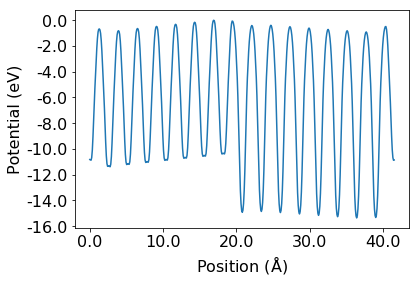

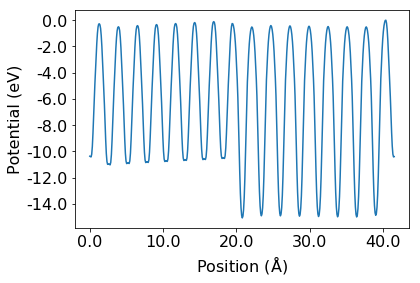

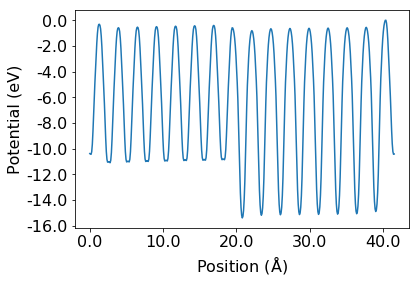

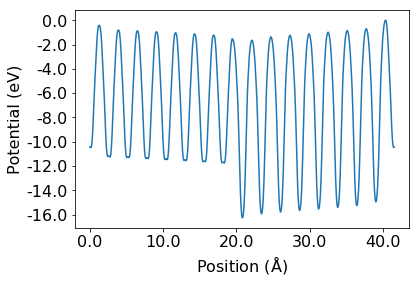

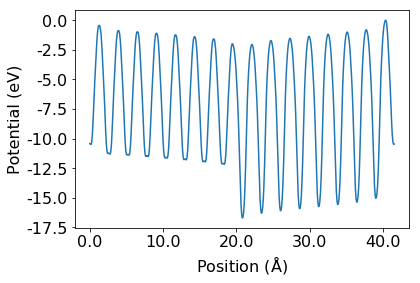

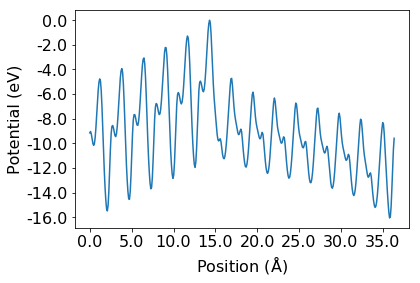

In [136]:
a = PlotPotential("/home/nadamski/")
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0000/")
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0008/")
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0012/")
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0024/")
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0033/")
a = PlotPotential("/home/nadamski/Ga6Sc8/HSE/loc")



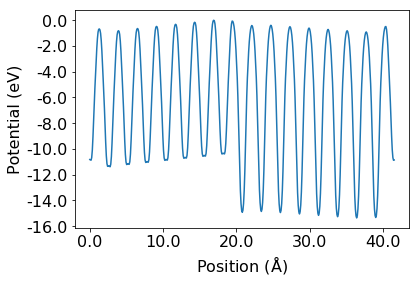

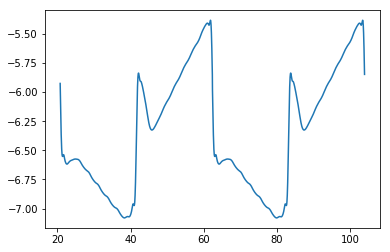

In [141]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0000/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))


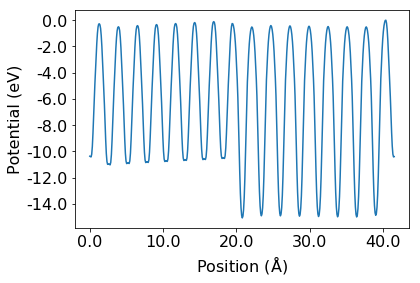

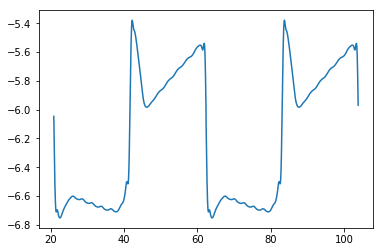

In [142]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0008/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))


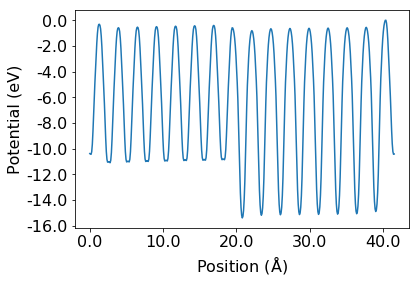

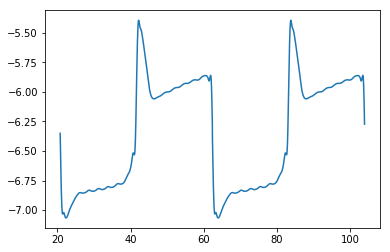

In [143]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0012/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))


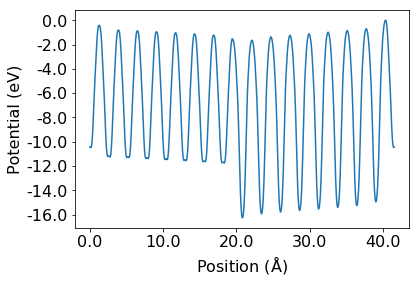

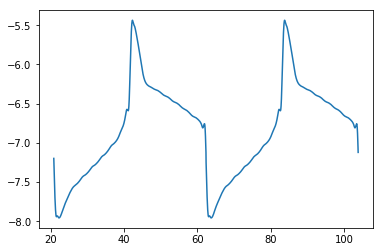

In [144]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0024/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))


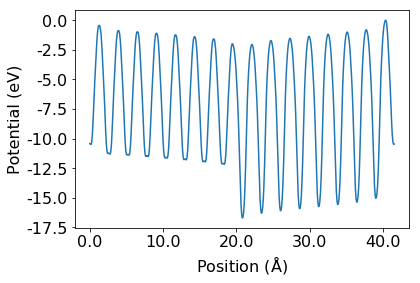

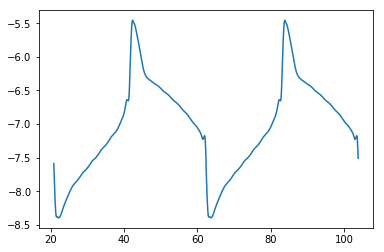

In [146]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/0033/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))


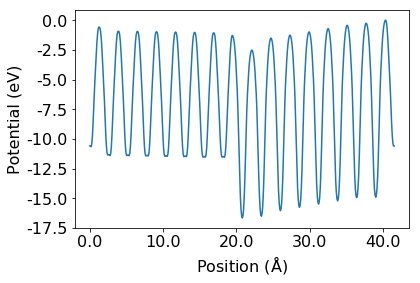

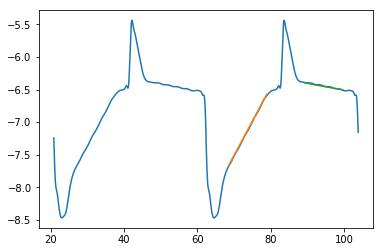

In [161]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/HSE0000/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[13000:18000]
efield = 0.093 / (10) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals+x[2*L], efield-10.5) #ScN


xvals =  x[23000:28000]
efield = -0.093 / (2 + 8.9 + 90) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals+x[2*L], efield-5.9) #GaN

plt.show()


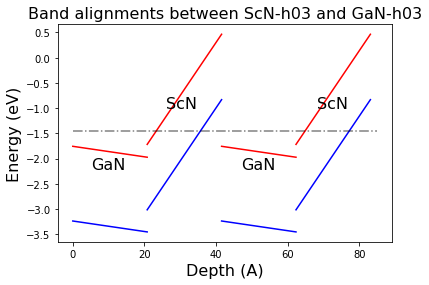

In [169]:
#plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[10000:20000]
efield = 0.093 / (10) / 8.85e-12 / 1e10 * xvals


plt.plot(xvals+x[2*L], efield-10.5+VB_Sc,'b') #ScN
plt.plot(xvals+x[2*L], efield-10.5+CB_Sc,'r') #ScN


plt.plot(xvals, efield-10.5+VB_Sc,'b') #ScN
plt.plot(xvals, efield-10.5+CB_Sc,'r') #ScN


xvals =  x[20000:30000]
efield = -0.093 / (2 + 8.9 + 90) / 8.85e-12 / 1e10 * xvals


plt.plot(xvals-x[2*L], efield-5.9+VB_Ga,'b') #GaN
plt.plot(xvals-x[2*L], efield-5.9+CB_Ga,'r') #GaN


plt.plot(xvals, efield-5.9+VB_Ga,'b') #GaN
plt.plot(xvals, efield-5.9+CB_Ga,'r') #GaN

plt.plot([0, 85], [-1.4544, -1.4544], 'k-.', alpha=0.5)

plt.text(5.09, -2.2, r'GaN', color='k', fontsize=16)
plt.text(26.09, -1.0, r'ScN', color='k', fontsize=16)
plt.text(47.09, -2.2, r'GaN', color='k', fontsize=16)
plt.text(68.09, -1.0, r'ScN', color='k', fontsize=16)


plt.xlabel(r'Depth (A)', fontsize=16)
plt.ylabel(r'Energy (eV)', fontsize=16)
plt.title('Band alignments between ScN-h03 and GaN-h03', fontsize=16)
plt.savefig('Ga8Sc8_hex.png', bbox_inches='tight', format='png', dpi=300)
plt.show()
#STAGGERED GAP

In [164]:
0.093 / (10) / 8.85e-12 / 1e10 * xvals


array([4.36708093, 4.36729928, 4.36751764, ..., 6.54996633, 6.55018468,
       6.55040304])

In [166]:
0.093 / (10) / 8.85e-12

1050847457.6271185

In [167]:
-0.093 / (2 + 8.9 + 90) / 8.85e-12 / 1e10

-0.010414741899178579

In [168]:
-0.093 / (2 + 8.9 + 24) / 8.85e-12 / 1e10

-0.03011024233888592

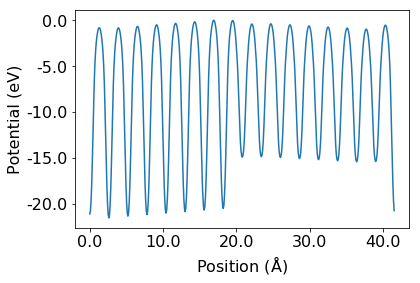

-7.618716429784631


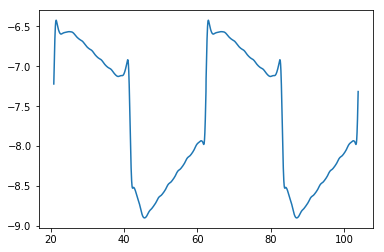

In [205]:
a = PlotPotential("/home/nadamski/SupLatPots/Al8Sc8/test/0000")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

print(np.mean(a[1]))
#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

x_f = x +x[L]
y_f = np.array(list(avgl[L:R])+ list(avgl[L:R]))

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))
plt.show()


In [176]:
VB_Ga = 3.095894
CB_Ga = 4.576501

VB_Sc = 5.301498
CB_Sc = 6.598293

VB_Al = 4.746871
CB_Al = 10.278848

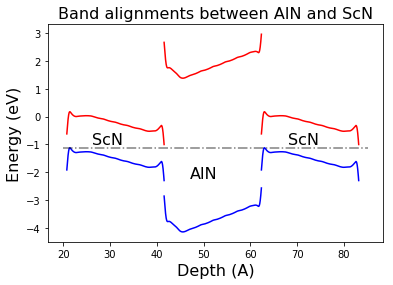

In [196]:
#plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

H = 20000

plt.plot(x_f[0:L], y_f[0:L]+VB_Sc,'b') #ScN
plt.plot(x_f[0:L], y_f[0:L]+CB_Sc,'r') #ScN


plt.plot(x_f[L:H], y_f[L:H]+VB_Al,'b') #ScN
plt.plot(x_f[L:H], y_f[L:H]+CB_Al,'r') #ScN

plt.plot(x_f[H:R], y_f[H:R]+VB_Sc,'b') #ScN
plt.plot(x_f[H:R], y_f[H:R]+CB_Sc,'r') #ScN




plt.plot([20, 85], [6.4720 + -7.618716,6.4720 + -7.618716], 'k-.', alpha=0.5)

plt.text(26.09, -1.0, r'ScN', color='k', fontsize=16)
plt.text(47.09, -2.2, r'AlN', color='k', fontsize=16)
plt.text(68.09, -1.0, r'ScN', color='k', fontsize=16)


plt.xlabel(r'Depth (A)', fontsize=16)
plt.ylabel(r'Energy (eV)', fontsize=16)
plt.title('Band alignments between AlN and ScN', fontsize=16)
plt.savefig('test.png', bbox_inches='tight', format='png', dpi=300)
plt.show()
#STAGGERED GAP

In [197]:
max(y_f[H:R]+VB_Sc)

-1.1228982709315067

In [198]:
6.4720 + -7.618716

-1.1467159999999996

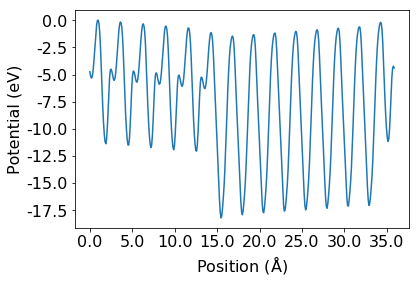

-7.417439305030537


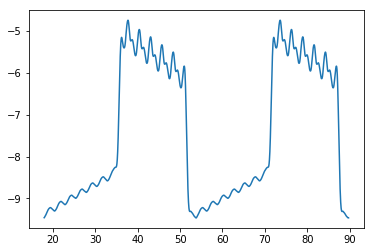

In [201]:
a = PlotPotential("/home/nadamski/test/test")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

print(np.mean(a[1]))
#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1400
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

x_f = x +x[L]
y_f = np.array(list(avgl[L:R])+ list(avgl[L:R]))

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))
plt.show()


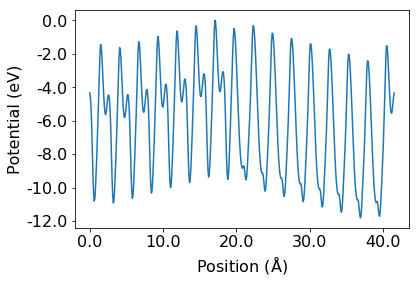

-6.03810737064995


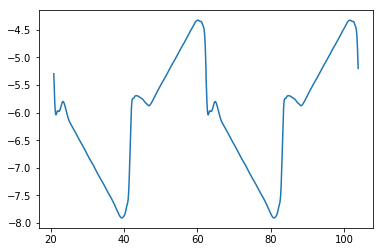

In [207]:
a = PlotPotential("/home/nadamski/SupLatPots/Al8Sc8/test/3232")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

print(np.mean(a[1]))
#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

x_f = x +x[L]
y_f = np.array(list(avgl[L:R])+ list(avgl[L:R]))

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))
plt.show()


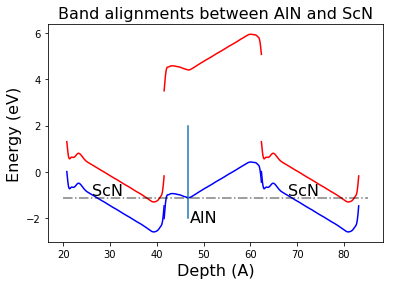

In [217]:
#plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

H = 20000

plt.plot(x_f[0:L], y_f[0:L]+VB_Sc,'b') #ScN
plt.plot(x_f[0:L], y_f[0:L]+CB_Sc,'r') #ScN


plt.plot(x_f[L:H], y_f[L:H]+VB_Al,'b') #ScN
plt.plot(x_f[L:H], y_f[L:H]+CB_Al,'r') #ScN

plt.plot(x_f[H:R], y_f[H:R]+VB_Sc,'b') #ScN
plt.plot(x_f[H:R], y_f[H:R]+CB_Sc,'r') #ScN



plt.plot([46.75, 46.75], [-2, 2])
plt.plot([20, 85], [6.4720 + -7.618716,6.4720 + -7.618716], 'k-.', alpha=0.5)

plt.text(26.09, -1.0, r'ScN', color='k', fontsize=16)
plt.text(47.09, -2.2, r'AlN', color='k', fontsize=16)
plt.text(68.09, -1.0, r'ScN', color='k', fontsize=16)


plt.xlabel(r'Depth (A)', fontsize=16)
plt.ylabel(r'Energy (eV)', fontsize=16)
plt.title('Band alignments between AlN and ScN', fontsize=16)
plt.savefig('test.png', bbox_inches='tight', format='png', dpi=300)
plt.show()
#STAGGERED GAP

In [213]:
x[-1]/2 + x[-1]/16

46.751250000000006

In [214]:
x[-1]*9/16

46.751250000000006

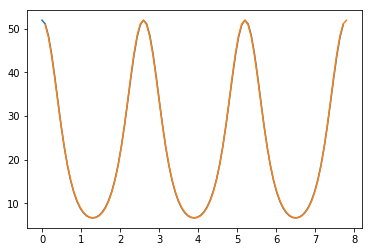

In [190]:
chg = vasp.Chgcar.from_file("/home/nadamski/test/CHGCAR")
y = chg.get_average_along_axis(2)
x = np.array(chg.get_axis_grid(2))
plt.plot(x,y)
plt.plot(x[-1]-x+x[1], y)


In [191]:
y

array([51.9111905 , 51.07900871, 48.44436112, 44.28242826, 39.07519028,
       33.42726807, 27.91459528, 22.94812092, 18.72790902, 15.28846674,
       12.57673557, 10.50011713,  8.95995374,  7.87074181,  7.16225679,
        6.77676074,  6.67099294,  6.82598159,  7.25710863,  8.00463443,
        9.12295587, 10.67812744, 12.75061114, 15.43343981, 18.81408124,
       22.94344983, 27.79222532, 33.17807787, 38.72194973, 43.88696674,
       48.09835849, 50.87618551, 51.91118933, 51.07898627, 48.4443242 ,
       44.28238692, 39.07515317, 33.42723948, 27.91457503, 22.94810646,
       18.72789774, 15.28845738, 12.576728  , 10.50011142,  8.95994992,
        7.87073972,  7.16225598,  6.77676059,  6.67099294,  6.82598176,
        7.25710957,  8.00463685,  9.12296031, 10.67813411, 12.75061995,
       15.43345056, 18.81409387, 22.94346537, 27.79224613, 33.17810637,
       38.72198604, 43.88700664, 48.09839346, 50.87620571, 51.91118815,
       51.07896382, 48.44428729, 44.28234558, 39.07511607, 33.42

In [29]:
from itertools import cycle, islice, dropwhile
y2 = list(y) + list(y)

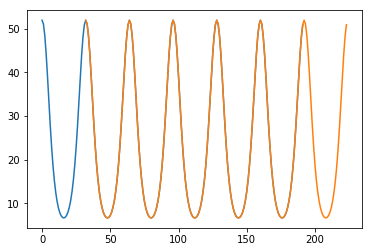

In [36]:
plt.plot(y2)
plt.plot(range(32, 224),y2)

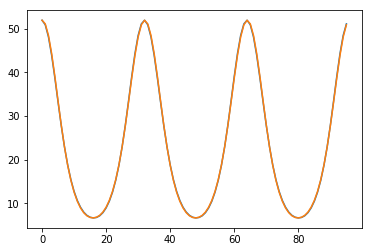

In [70]:
cycy = cycle(y)
N = 33
sliced = list(islice(cycy, N, 96+N))[::-1]
plt.plot(sliced)
plt.plot(y)

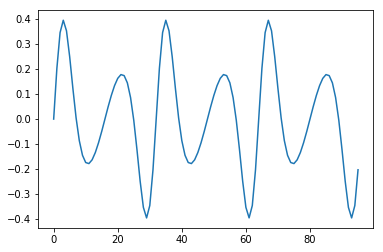

In [72]:
plt.plot(y - sliced)

In [83]:
test = Structure.from_file('/home/nadamski/0_0.vasp')

In [93]:
[(test[1+k].c - test[0+k].c)*3/4 + test[0+k].c for k in range(0,15)]

[0.049173122882050904,
 0.11195448232615841,
 0.17474837831455226,
 0.2375343144564681,
 0.3003025987678089,
 0.363079836822374,
 0.42607004830070844,
 0.4940537358596071,
 0.5586424553093874,
 0.6207738917982741,
 0.6826136125886837,
 0.7444566979574354,
 0.8062990062856521,
 0.8680248374472956,
 0.9292997633708726]

In [96]:
(1.0021378332045785 - 0.9445841041715752) * 3/4 +  0.9445841041715752

0.9877494009463277

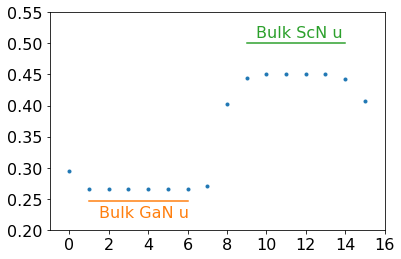

In [46]:
# Cation between two N
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

relaxed = Structure.from_file('/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE_bulk/CONTCAR')


u = np.array([(1+relaxed[0].c-relaxed[16].c)/(1+relaxed[17].c-relaxed[16].c)] + [(relaxed[i].c-relaxed[i+16].c)/(relaxed[i+17].c-relaxed[i+16].c) for i in range(1,15)] +  [(relaxed[15].c-relaxed[31].c)/(relaxed[16].c-relaxed[31].c)])


plt.plot(u,'.')
plt.plot([1, 6], [0.246, 0.246])
plt.plot([9, 14], [0.5, 0.5])
ax.text(1.5, 0.22, 'Bulk GaN u', color='C1', fontsize=16)
ax.text(9.5, 0.51, 'Bulk ScN u', color='C2', fontsize=16)

plt.axis([-1, 16, 0.2, 0.55])

ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=16) 
plt.savefig('/home/nadamski/dielec_relax.png', bbox_inches='tight', format='png', dpi=300)

plt.show()


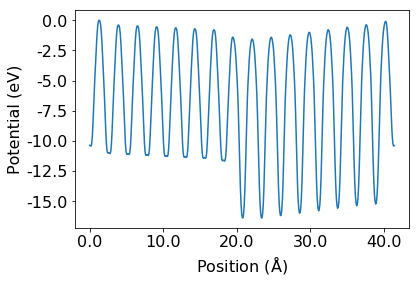

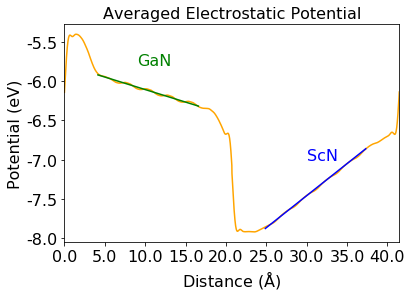

In [16]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE00/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1250
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]),'orange')

xvals =  x[12000:18000]
efield1 = 0.093 / (12.9) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1-9.9,'blue') #ScN
plt.xlim([0, x[-1]/2])
plt.text(30, -7, 'ScN', color='b', fontsize=16)

xvals =  x[22000:28000]
efield2 = -0.093 / (33) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals-x[-1]/2, efield2-4.47,'green') #GaN
plt.text(9, -5.8, 'GaN', color='green', fontsize=16)


plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()


In [28]:
0.11330490557924533/2

0.056652452789622665

In [159]:
0.093 / (12.9) / 8.85e-12 / 1e10 - -0.093 / (33) / 8.85e-12 / 1e10

0.11330490557924533

In [160]:
0.093 / (2 + 6.517 + 9.034) / 8.85e-12

598739363.9263395

In [161]:
598739363.9263395 * 2

1197478727.852679

In [163]:
0.11330490557924533/2 * (2 + 6.517 + 9.034) * 8.85e-12 * 1e10

0.0879961871035941

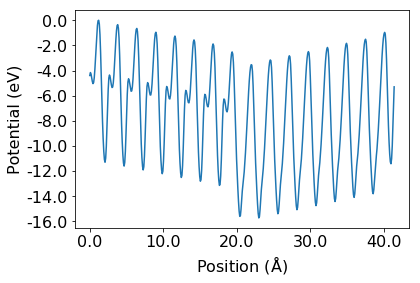

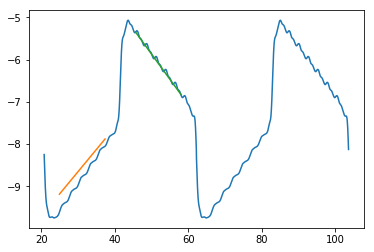

In [4]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE_25/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1239
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L], list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[12000:18000]
efield1 = 0.093 / (10) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield1-11.8) #ScN


xvals =  x[22000:28000]
efield2 = -0.093 / (8.8) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals, efield2+0.1) #GaN

plt.show()


In [186]:
0.093 / (10) / 8.85e-12 - -0.093 / (8.8) / 8.85e-12

2244992295.839753

In [188]:
2244992295.839753/2 * (2 + 5.845 + 7.520326) * 8.85e-12

0.15264054533181817

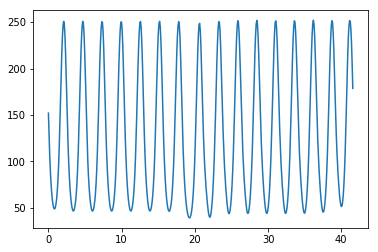

In [189]:
chg = vasp.Chgcar.from_file("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE_25/CHGCAR")
y = chg.get_average_along_axis(2)
x = np.array(chg.get_axis_grid(2))
plt.plot(x,y)


In [2]:
Ga

NameError: name 'Ga' is not defined